In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, KFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
import joblib, scipy
from imblearn.over_sampling import SMOTE
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('star_classification.csv')
df.head()

obj_ID   alpha  delta      u      g      r      i      z  \
0 1237660961327743232.000 135.689 32.495 23.879 22.275 20.395 19.166 18.794   
1 1237664879951151104.000 144.826 31.274 24.778 22.832 22.584 21.168 21.614   
2 1237660961330430208.000 142.189 35.582 25.263 22.664 20.610 19.349 18.948   
3 1237663478724297984.000 338.741 -0.403 22.137 23.777 21.612 20.505 19.250   
4 1237680272041378048.000 345.283 21.184 19.437 17.580 16.497 15.977 15.545   

   run_ID  rerun_ID  cam_col  field_ID              spec_obj_ID   class  \
0    3606       301        2        79  6543777369295181824.000  GALAXY   
1    4518       301        5       119 11760142036707334144.000  GALAXY   
2    3606       301        2       120  5152200256025548800.000  GALAXY   
3    4192       301        3       214 10301071412954419200.000  GALAXY   
4    8102       301        3       137  6891864880783316992.000  GALAXY   

   redshift  plate    MJD  fiber_ID  
0     0.635   5812  56354       171  
1     0.779  10445  58158       427  
2     0.644   4576  55592       299  
3     0.932   9149  58039       775  
4     0.116   6121  56187       842

In [4]:
df.shape

(100000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df.describe()

obj_ID      alpha      delta          u          g  \
count              100000.000 100000.000 100000.000 100000.000 100000.000   
mean  1237664721814577152.000    177.629     24.135     21.980     20.531   
std         8438559894562.677     96.502     19.645     31.769     31.750   
min   1237645942904389888.000      0.006    -18.785  -9999.000  -9999.000   
25%   1237659161195119360.000    127.518      5.147     20.352     18.965   
50%   1237663463144292864.000    180.901     23.646     22.179     21.100   
75%   1237668350286447104.000    233.895     39.902     23.687     22.124   
max   1237680531356386304.000    360.000     83.001     32.781     31.602   

               r          i          z     run_ID   rerun_ID    cam_col  \
count 100000.000 100000.000 100000.000 100000.000 100000.000 100000.000   
mean      19.646     19.085     18.669   4481.366    301.000      3.512   
std        1.855      1.758     31.728   1964.765      0.000      1.587   
min        9.822      9.470  -9999.000    109.000    301.000      1.000   
25%       18.136     17.732     17.461   3187.000    301.000      2.000   
50%       20.125     19.405     19.005   4188.000    301.000      4.000   
75%       21.045     20.396     19.921   5326.000    301.000      5.000   
max       29.572     32.141     29.384   8162.000    301.000      6.000   

        field_ID              spec_obj_ID   redshift      plate        MJD  \
count 100000.000               100000.000 100000.000 100000.000 100000.000   
mean     186.131  5783882297557275648.000      0.577   5137.010  55588.647   
std      149.011  3324016169583855104.000      0.731   2952.303   1808.484   
min       11.000   299519089380976640.000     -0.010    266.000  51608.000   
25%       82.000  2844137590766986752.000      0.055   2526.000  54234.000   
50%      146.000  5614883135353542656.000      0.424   4987.000  55868.500   
75%      241.000  8332144107427485696.000      0.704   7400.250  56777.000   
max      989.000 14126940609093851136.000      7.011  12547.000  58932.000   

        fiber_ID  
count 100000.000  
mean     449.313  
std      272.498  
min        1.000  
25%      221.000  
50%      433.000  
75%      645.000  
max     1000.000

In [7]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, field_ID, spec_obj_ID, class, redshift, plate, MJD, fiber_ID]
Index: []

There is no missing and duplicate data present in the dataset.

## Data Preprocessing and Exploratory Data Analysis

## Univariate Analysis

Obj_Id
Skewness: 0.39872717908199823
Kurtosis: -0.6061681827640228
Distribution Plot:


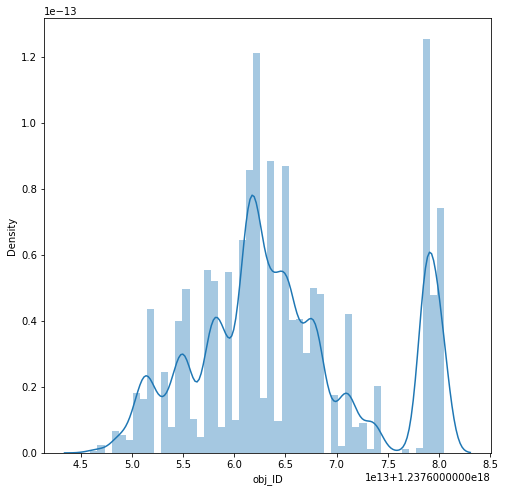

Box Plot:


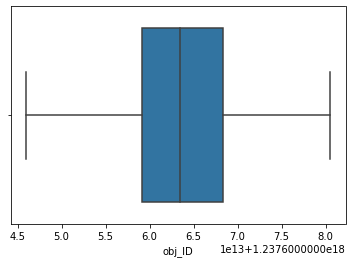

Quantile-Quantile Plot:


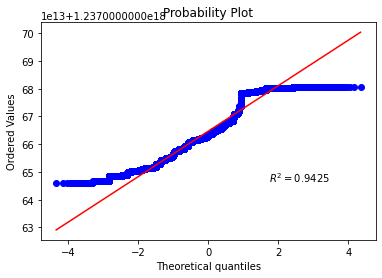

-------------------------
Alpha
Skewness: -0.028510865453805028
Kurtosis: -0.5371908037277096
Distribution Plot:


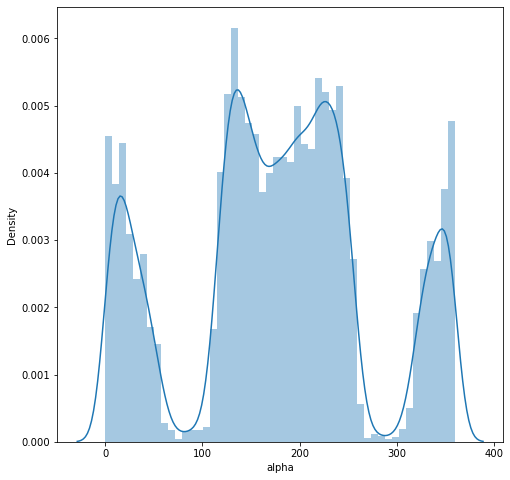

Box Plot:


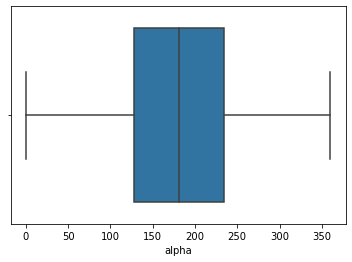

Quantile-Quantile Plot:


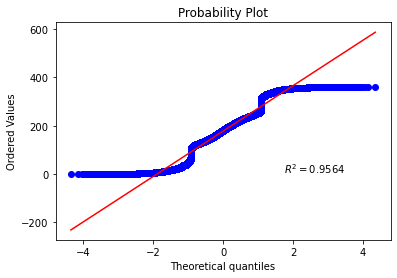

-------------------------
Delta
Skewness: 0.1750785620755768
Kurtosis: -1.0430621953397208
Distribution Plot:


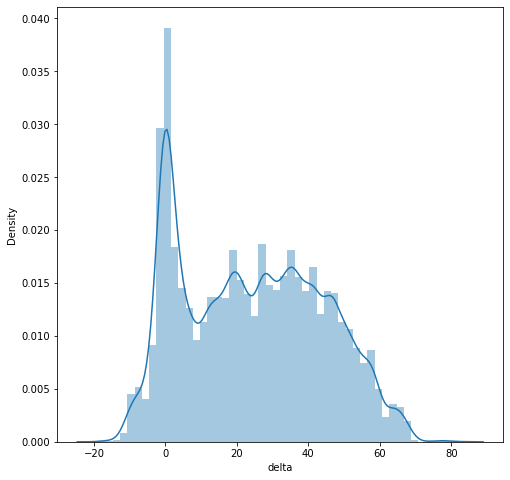

Box Plot:


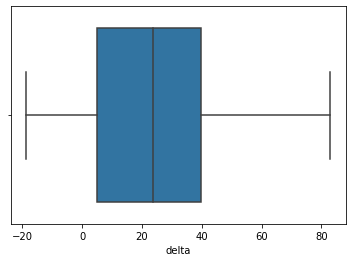

Quantile-Quantile Plot:


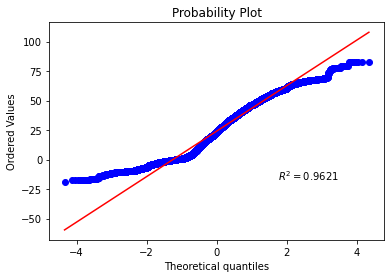

-------------------------
U
Skewness: -313.84924237751426
Kurtosis: 98998.36515698693
Distribution Plot:


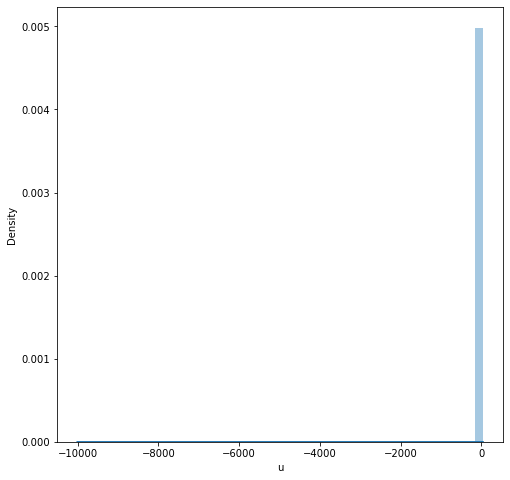

Box Plot:


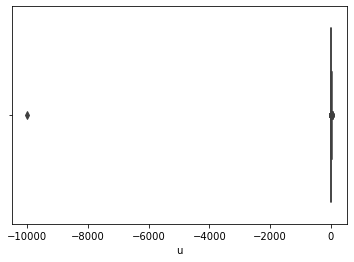

Quantile-Quantile Plot:


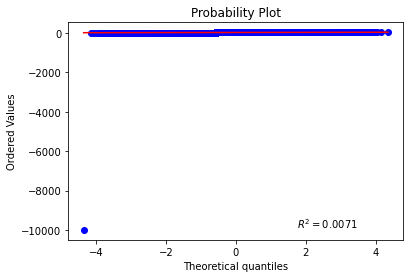

-------------------------
G
Skewness: -314.2766945750886
Kurtosis: 99178.14734351567
Distribution Plot:


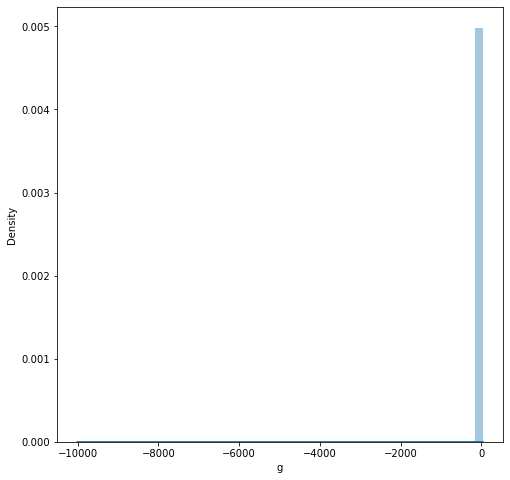

Box Plot:


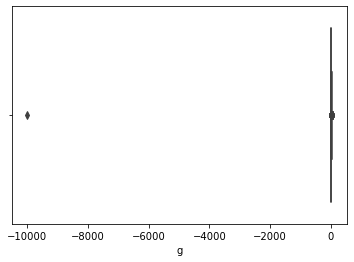

Quantile-Quantile Plot:


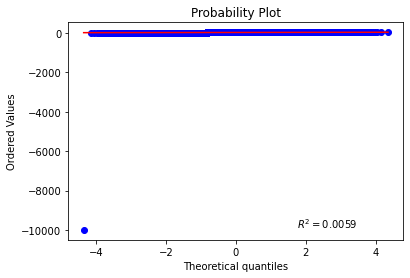

-------------------------
R
Skewness: -0.5078584323335763
Kurtosis: -0.37615756353922114
Distribution Plot:


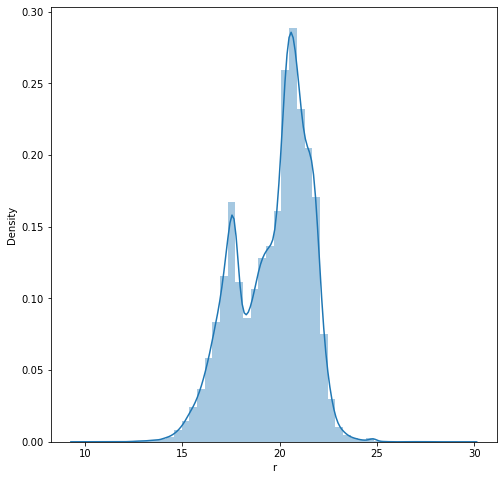

Box Plot:


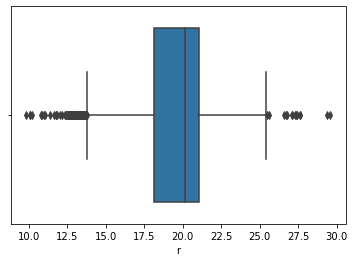

Quantile-Quantile Plot:


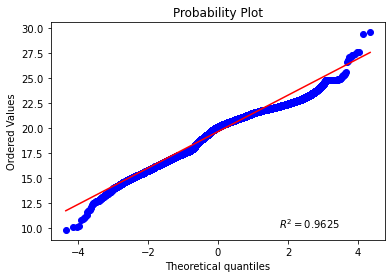

-------------------------
I
Skewness: -0.40416673966780764
Kurtosis: -0.23484446316863306
Distribution Plot:


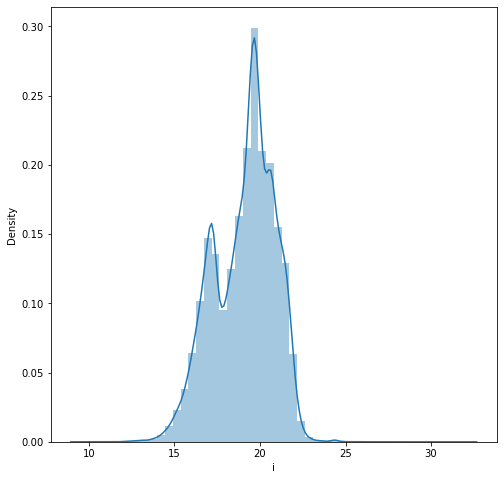

Box Plot:


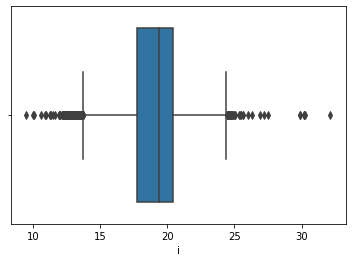

Quantile-Quantile Plot:


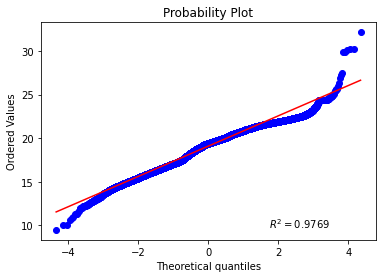

-------------------------
Z
Skewness: -314.759418791375
Kurtosis: 99381.34524315965
Distribution Plot:


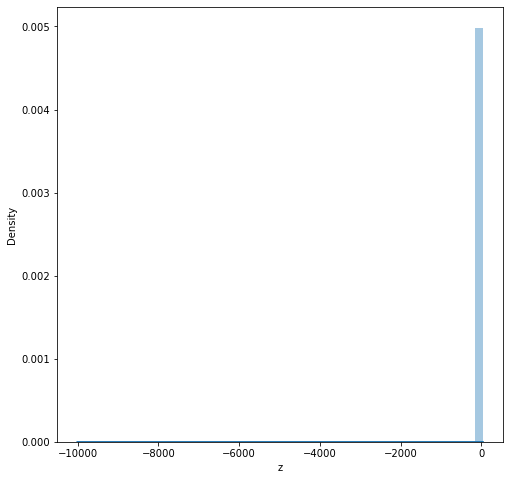

Box Plot:


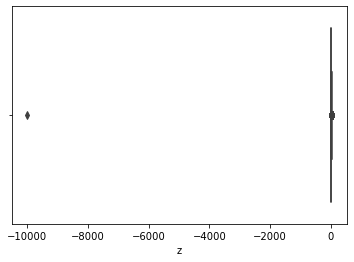

Quantile-Quantile Plot:


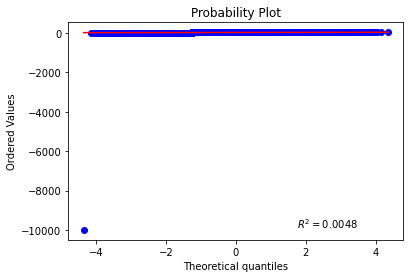

-------------------------
Run_Id
Skewness: 0.3987105222898206
Kurtosis: -0.6061694244851901
Distribution Plot:


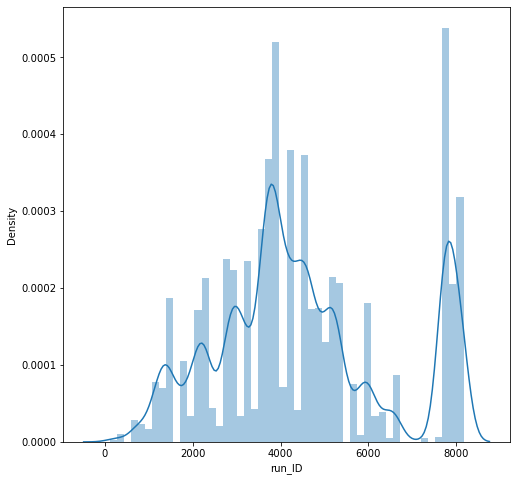

Box Plot:


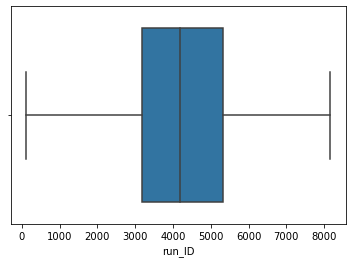

Quantile-Quantile Plot:


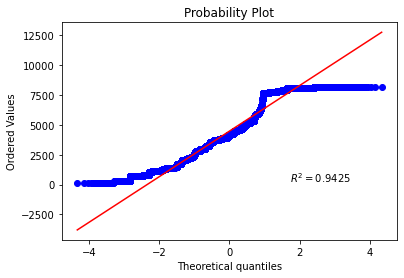

-------------------------
Rerun_Id
Skewness: 0
Kurtosis: 0
Distribution Plot:


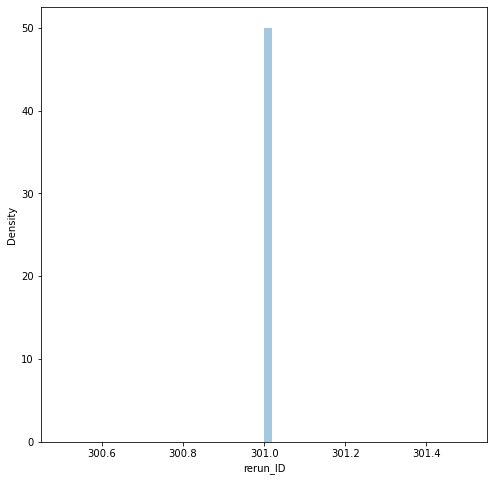

Box Plot:


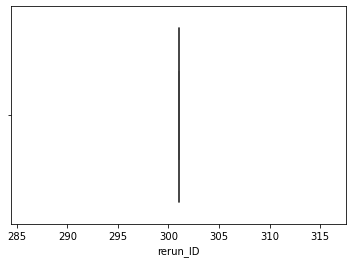

Quantile-Quantile Plot:


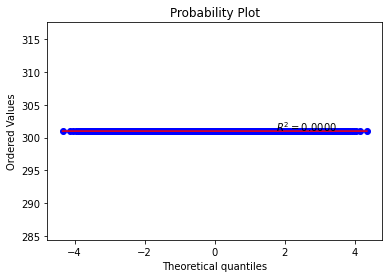

-------------------------
Cam_Col
Skewness: -0.030531673216738223
Kurtosis: -1.114304881728583
Distribution Plot:


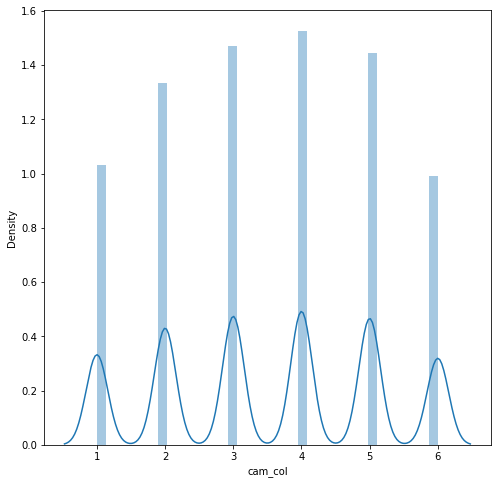

Box Plot:


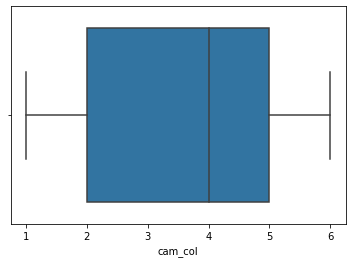

Quantile-Quantile Plot:


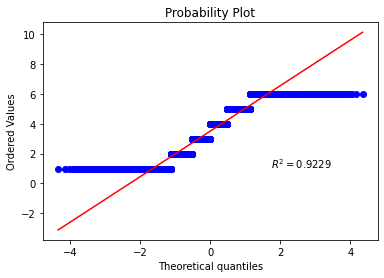

-------------------------
Field_Id
Skewness: 1.7534250595460243
Kurtosis: 3.703783011260478
Distribution Plot:


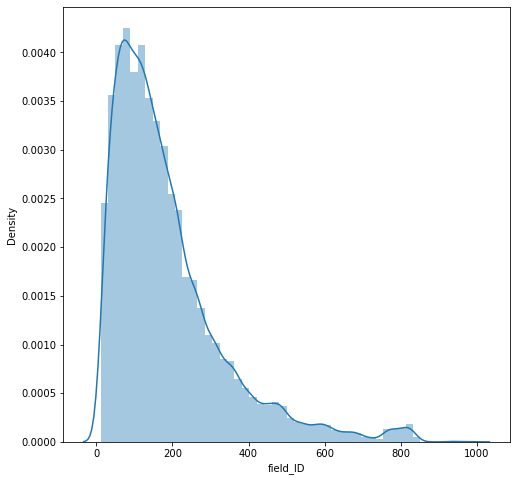

Box Plot:


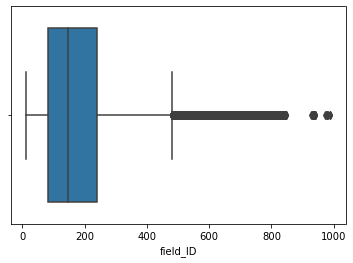

Quantile-Quantile Plot:


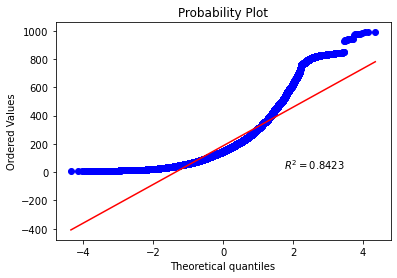

-------------------------
Spec_Obj_Id
Skewness: 0.19846274634146077
Kurtosis: -0.9047598893021798
Distribution Plot:


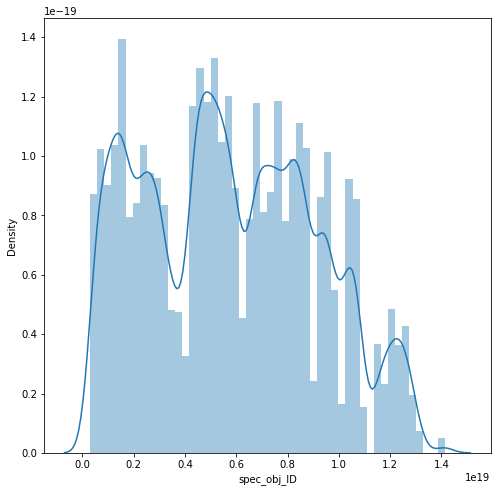

Box Plot:


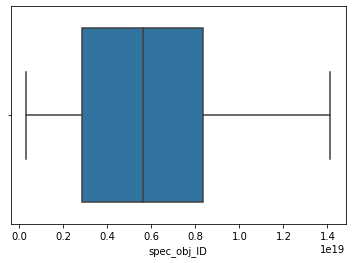

Quantile-Quantile Plot:


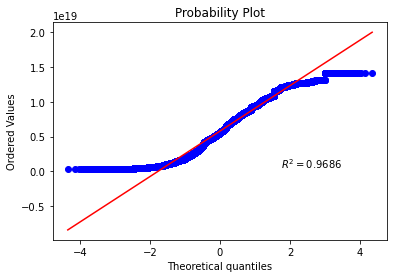

-------------------------
Redshift
Skewness: 2.5236063310340415
Kurtosis: 9.972915512318918
Distribution Plot:


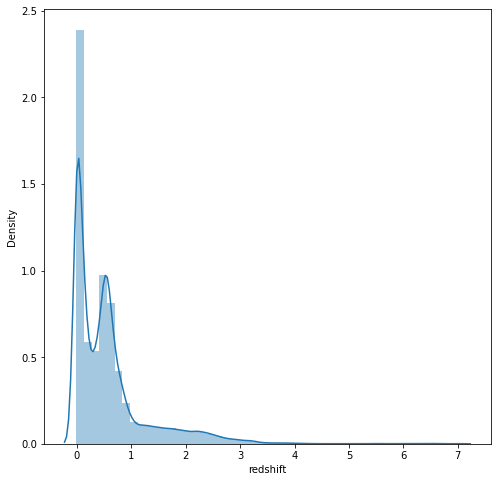

Box Plot:


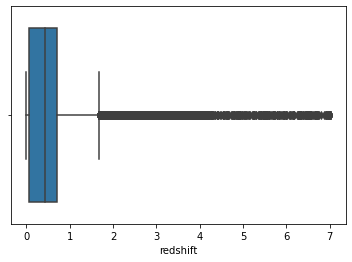

Quantile-Quantile Plot:


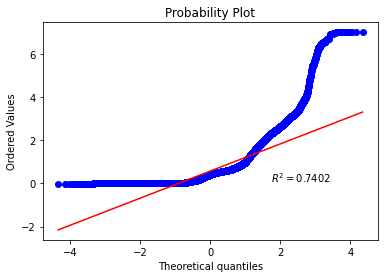

-------------------------
Plate
Skewness: 0.19847180267952066
Kurtosis: -0.9047511113310538
Distribution Plot:


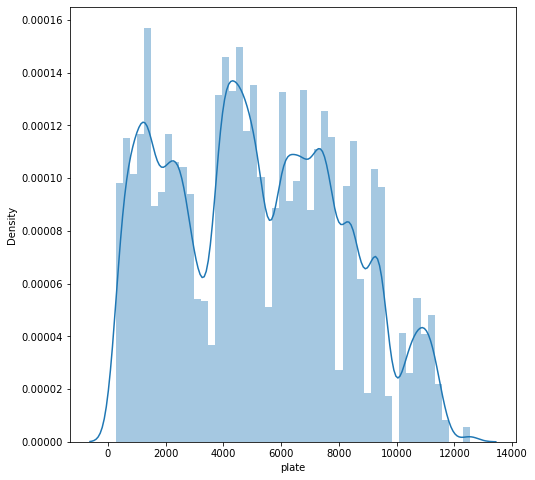

Box Plot:


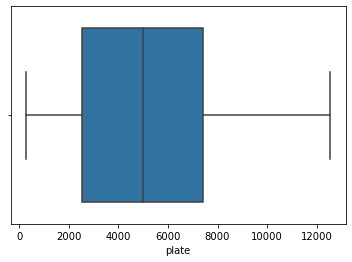

Quantile-Quantile Plot:


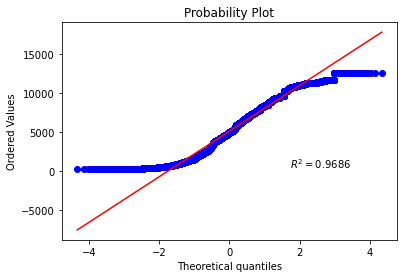

-------------------------
Mjd
Skewness: -0.3818531750786742
Kurtosis: -0.7731523267310263
Distribution Plot:


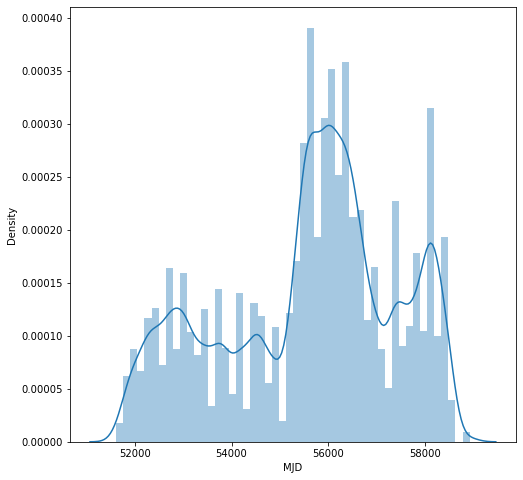

Box Plot:


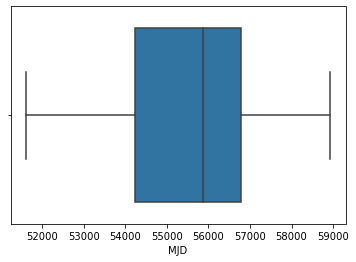

Quantile-Quantile Plot:


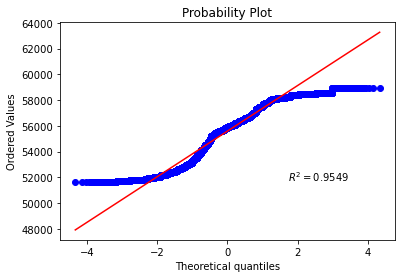

-------------------------
Fiber_Id
Skewness: 0.2297191201328803
Kurtosis: -0.98072188538332
Distribution Plot:


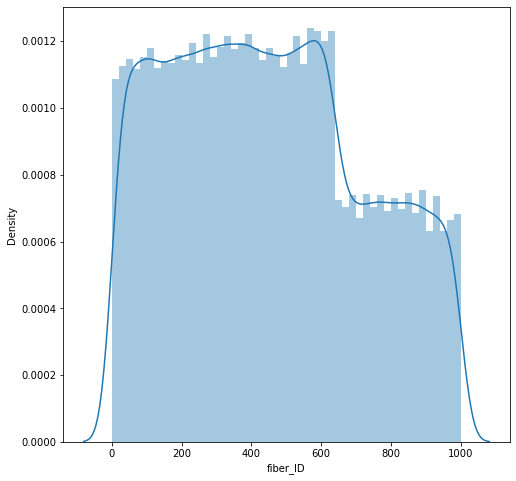

Box Plot:


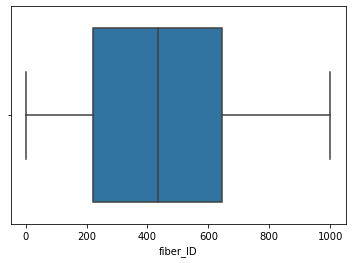

Quantile-Quantile Plot:


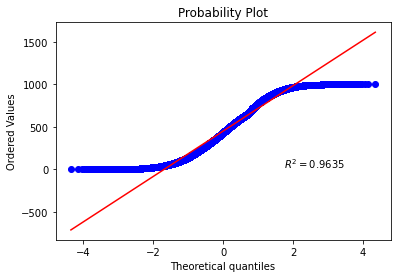

-------------------------


In [9]:
for col in df.columns:
    if col not in ['class']:
        print(col.title())
        print("Skewness:",df[col].skew())
        print("Kurtosis:",df[col].kurt())
        print("Distribution Plot:")
        plt.figure(figsize=(8,8))
        sns.distplot(df[col])
        plt.show()
        print("Box Plot:")
        sns.boxplot(df[col])
        plt.show()
        print("Quantile-Quantile Plot:")
        scipy.stats.probplot(df[col],plot=plt,rvalue=True)
        plt.show()
        print('-------------------------')

The distributions of features, "Field_Id" and "Redshift", are highly right skewed whereas those of features, "U", "G" and "Z" are substantially left skewed. Furthermore, there are numerous features which have presence of outliers in their corresponding distributions. The feature "rerun_ID" has zero variance so it can simply be eliminated as it isn't useful from the context of our analysis.

In [10]:
df.drop('rerun_ID',axis=1,inplace=True)

A modified version of the Julian date denoted MJD obtained by subtracting 2,400,000.5 days from the Julian date JD, The MJD therefore gives the number of days since midnight on November 17, 1858. This date corresponds to 2400000.5 days after day 0 of the Julian calendar.

So, what I'm gonna do is that I'm going to convert the feature 'Modified Julian Date' to 'Modified Julian Years'[MJY] by dividing the total number of days by 365 and subsequently, I'm gonna drop the MJD column.

In [11]:
df['MJY'] = df.MJD / 365.0

In [12]:
df.drop('MJD',axis=1,inplace=True)

([<matplotlib.patches.Wedge at 0x1ccdeeddf70>,
 [Text(-0.35086606341172927, 1.1475595869260804, 'GALAXY'),
  Text(-0.3239728189314008, -1.0512095949874325, 'STAR'),
  Text(0.9105454841380407, -0.6171765722350625, 'QSO')],
 [Text(-0.2046718703235087, 0.6694097590402136, '59.4%'),
  Text(-0.17671244668985497, -0.5733870518113268, '21.6%'),
  Text(0.49666117316620395, -0.33664176667367046, '19.0%')])

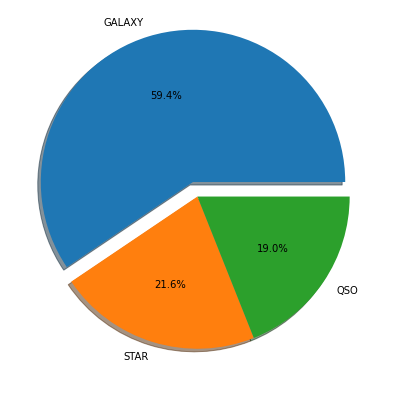

In [13]:
labels = df['class'].value_counts().keys()
values = df['class'].value_counts().values
explode = (0.1,0,0)
plt.figure(figsize=(13,7))
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')

<AxesSubplot:xlabel='class', ylabel='count'>

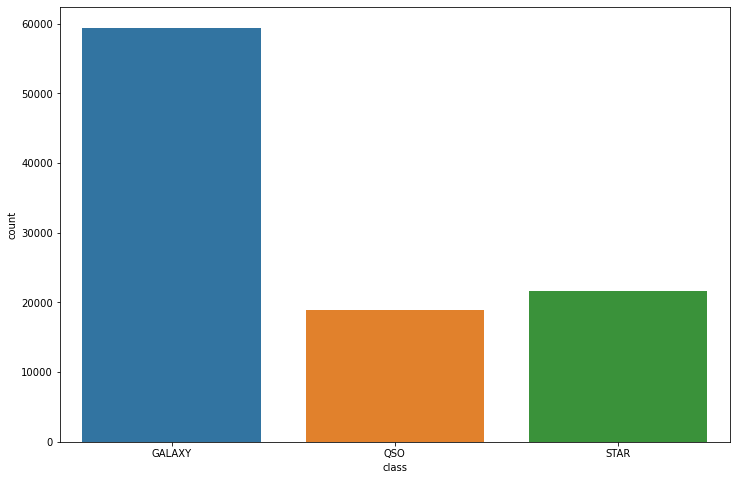

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(df['class'])

A significant proportion of the dependent feature column, "class" went for "GALAXY" which contributed to more than half of the gross share. Each of the target classes, "STAR" as well as "QSO", accounted for nearly one-fifth of the total share.

Moreover, the count plot suggests that the target classes are highly imbalanced with "GALAXY" being the majority class and "QSO" & "STAR" constituting the minority classes. This may have an adverse effect on the performance and efficiency of the machine learning models. So, the dependent feature column needs to be over-sampled using one of Imbalanced Learn library's oversampling techniques so that the target classes can be balanced out. 

## Bivariate Analysis

In [15]:
cc = np.corrcoef(df.drop('class',axis=1), rowvar=False)
VIF = np.linalg.inv(cc)
pd.DataFrame(df.drop('class',axis=1).columns,VIF.diagonal())

0
-1458700207023182.750       obj_ID
1.053                        alpha
1.211                        delta
870.266                          u
2730.782                         g
33.213                           r
32.117                           i
1501.786                         z
-1458711965250208.750       run_ID
-14868764.095              cam_col
-1952.483                 field_ID
240902827692246.188    spec_obj_ID
1.406                     redshift
240900203965435.844          plate
122328.356                fiber_ID
18.715                         MJY

In [16]:
temp = df.drop('class',axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = temp.columns
vif_data['VIF'] = [variance_inflation_factor(temp.values,i) for i in range(len(temp.columns))]

In [17]:
vif_data

Feature            VIF
0        obj_ID          0.000
1         alpha          1.000
2         delta          1.013
3             u          1.001
4             g          1.002
5             r          1.752
6             i          1.779
7             z          1.001
8        run_ID          1.061
9       cam_col          1.000
10     field_ID          1.007
11  spec_obj_ID          0.329
12     redshift          1.178
13        plate 2090999349.927
14     fiber_ID          1.062
15          MJY         17.017

<AxesSubplot:xlabel='i', ylabel='r'>

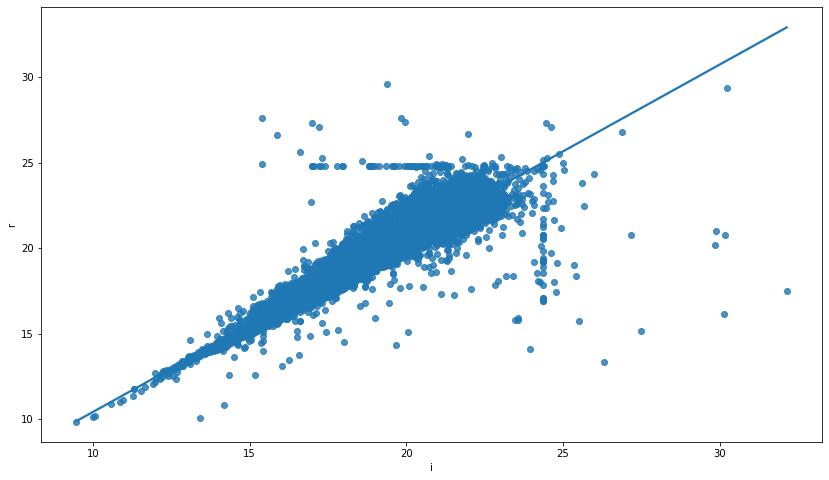

In [18]:
plt.figure(figsize=(14,8))
sns.regplot(df.i,df.r)

<AxesSubplot:xlabel='u', ylabel='g'>

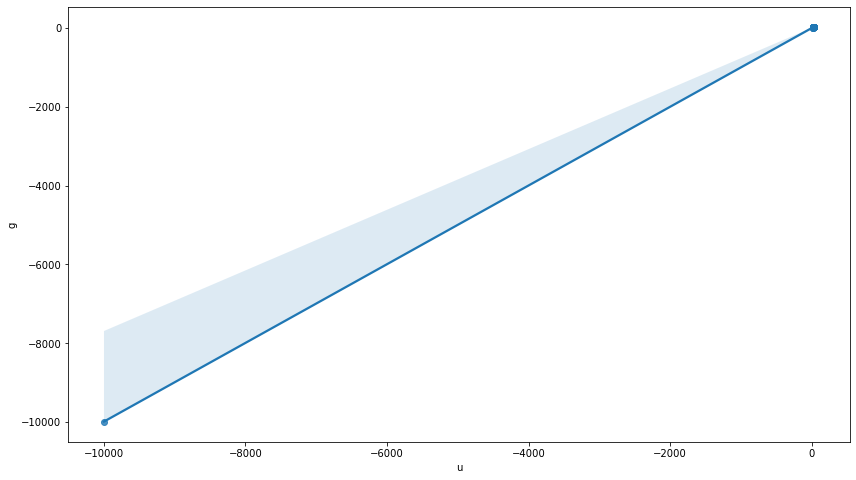

In [19]:
plt.figure(figsize=(14,8))
sns.regplot(df.u,df.g)

<AxesSubplot:xlabel='g', ylabel='z'>

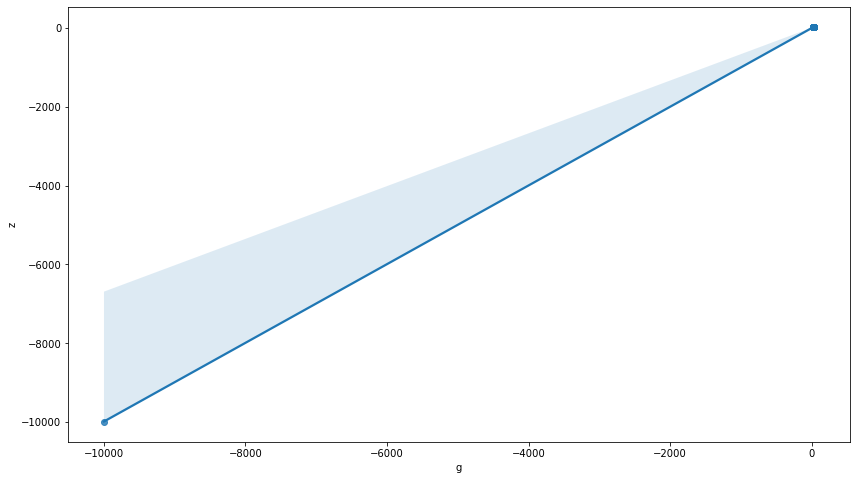

In [20]:
plt.figure(figsize=(14,8))
sns.regplot(df.g,df.z)

<AxesSubplot:xlabel='u', ylabel='z'>

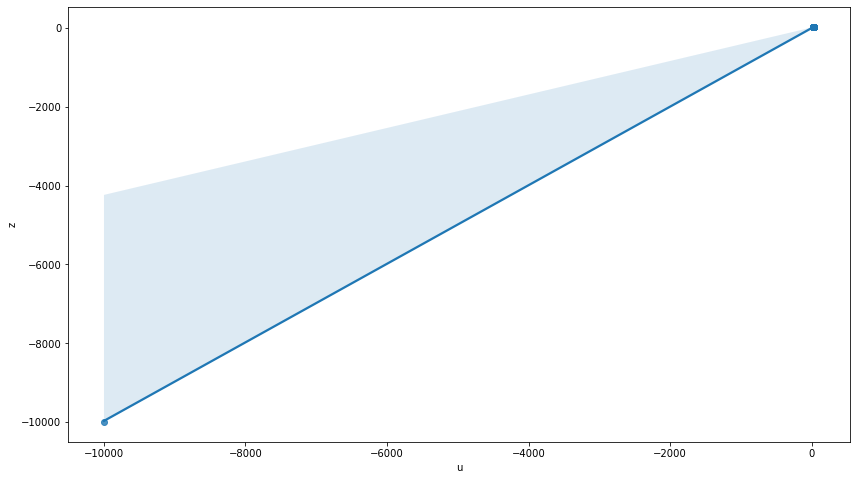

In [21]:
plt.figure(figsize=(14,8))
sns.regplot(df.u,df.z)

The features 'r' and 'i' seem to have very high positive correlation between each other due to their high Variance Inflation Factor values and the above regression fit proves that. Similarly, the feature 'u', 'g' and 'z' have really high positive correlation between themselves so it is quite obvious that any two features out of those three are redundant and need to be eliminated.

## Multivariate Analysis

<AxesSubplot:>

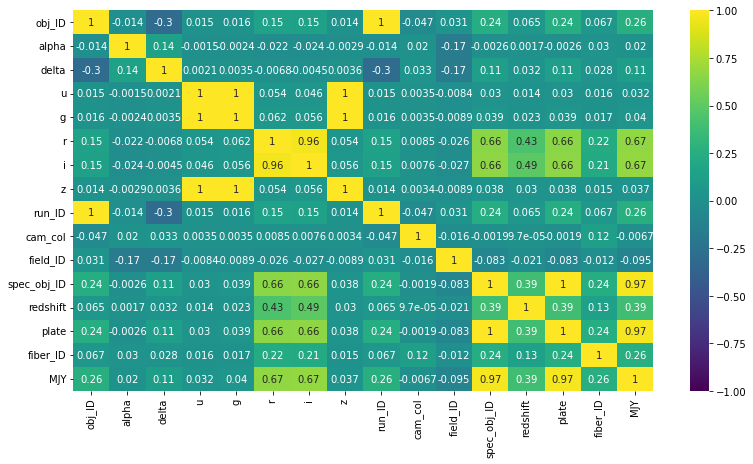

In [22]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

It is clearly evident from the above heatmap that there are several features which have perfect positive correlation between themselves so the issue of multicollinearity might arise as a result of that. Hence, these features need to be removed in order to prevent multicollinearity.

'u', 'g' and 'z' have perfect positive correlation among each other so only one of them is required for future analysis. So, I'm gonna drop 'g' and 'z' features.

In [23]:
df.drop(['g','z'],axis=1,inplace=True)

Likewise, the features 'plate' and 'spec_obj_ID' have perfect positive correlation between each other so one of them needs to be removed.

In [24]:
df.drop('spec_obj_ID',axis=1,inplace=True)

Moreover, there are two more features which are have highly significant positive correlation between each other, namely 'i' and 'r'. So, one of them must be dropped to avoid multicollinearity.

In [25]:
df.drop('i',axis=1,inplace=True)

The features 'run_ID' and 'obj_ID' have perfect positive correlation between each other so I'll be removing the 'obj_ID' column.

In [26]:
df.drop('obj_ID',axis=1,inplace=True)

### Plotting the heatmap once again after dropping the unnecessary features to examine the remaining features

<AxesSubplot:>

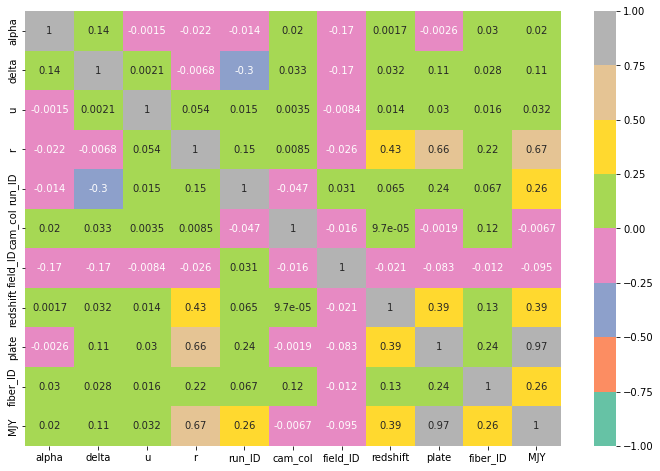

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Set2',vmin=-1,vmax=1)

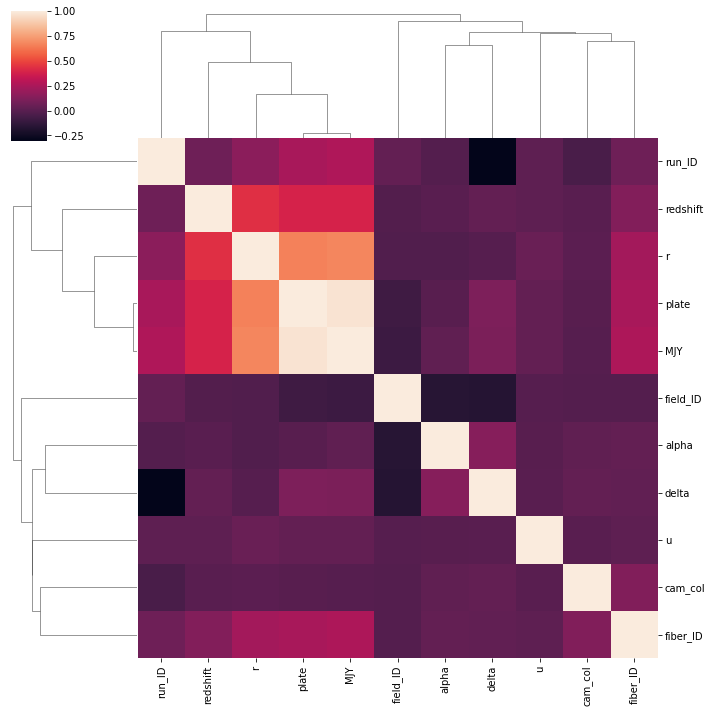

In [28]:
sns.clustermap(df.corr())

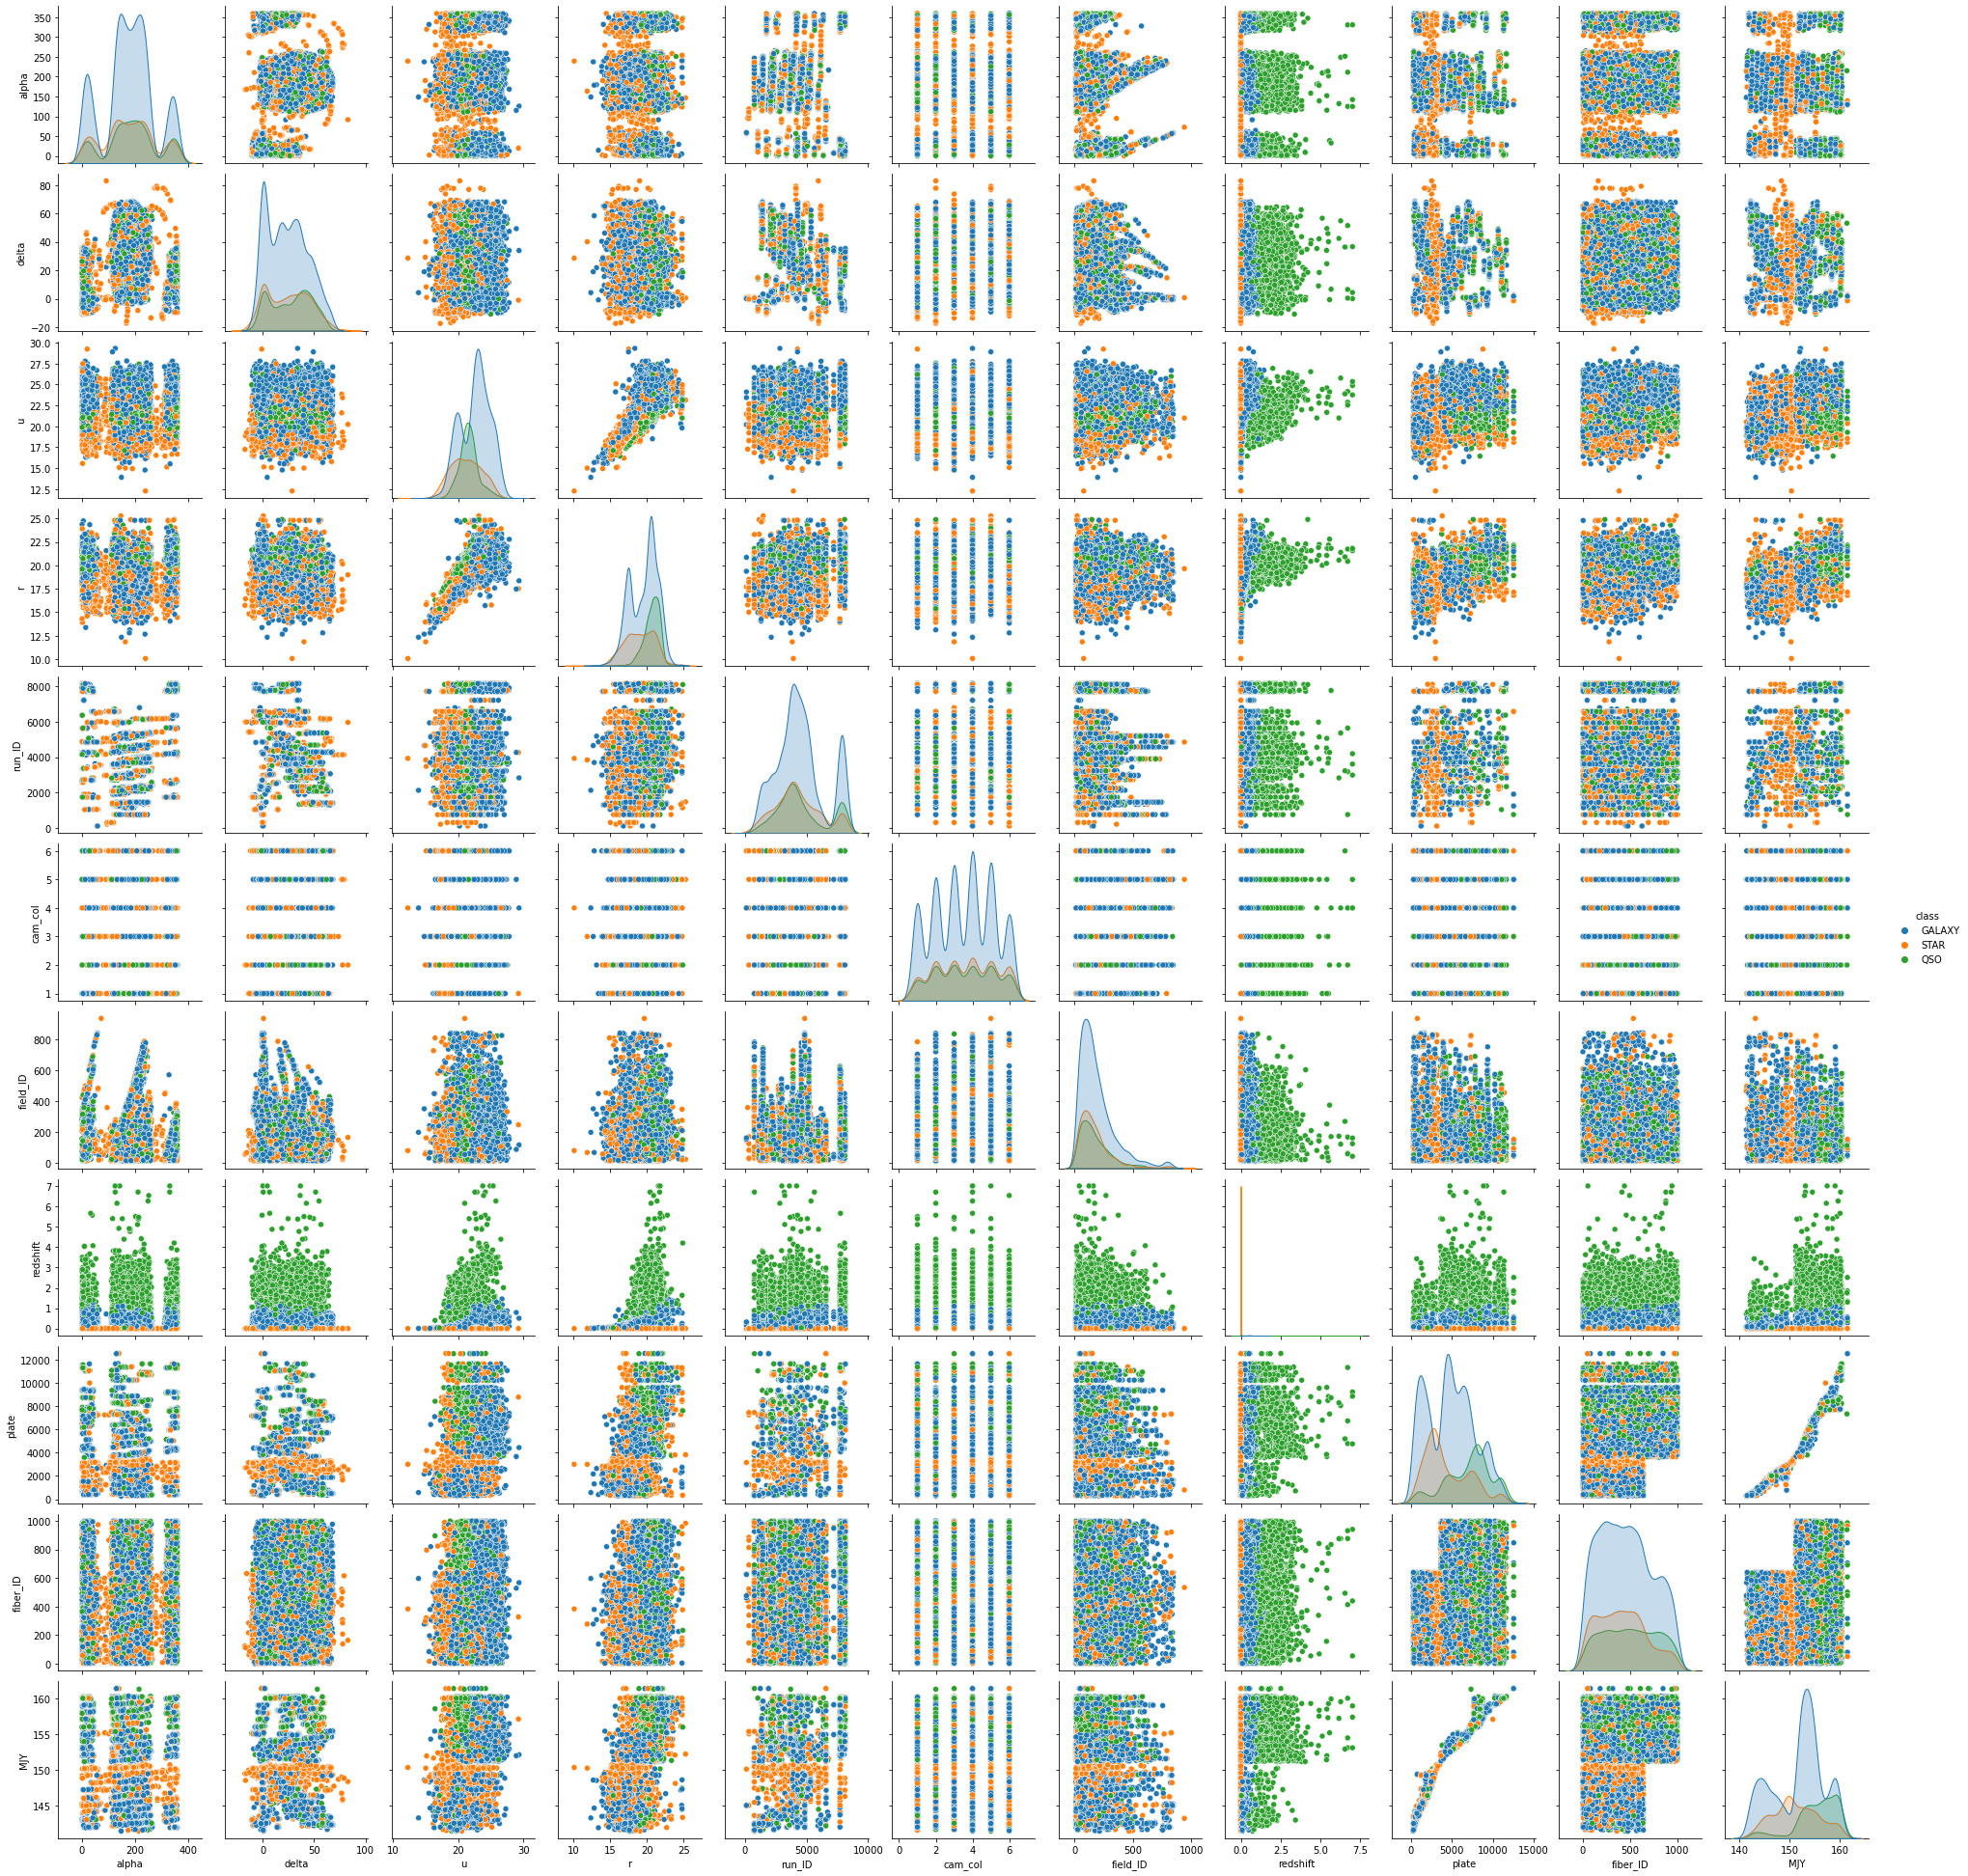

In [29]:
sns.pairplot(df.sample(n=10000),hue='class')

The distributions of most of the features follow the Gaussian distribution.

## Outlier Treatment

In [30]:
for col in df.drop('class',axis=1).columns:
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

## Dividing the dataset into predictor features and the target label

In [31]:
X = df.drop('class',axis=1)
y = df['class']

## Imbalancing the target classes using Imbalanced learning's Synthetic Minority Oversampling TEchnique(SMOTE)

In [32]:
smote = SMOTE()
X,y_smote = smote.fit_resample(X,y)

In [33]:
print("Before SMOTE:",Counter(y))
print("After SMOTE:",Counter(y_smote))

Before SMOTE: Counter({'GALAXY': 59445, 'STAR': 21594, 'QSO': 18961})
After SMOTE: Counter({'GALAXY': 59445, 'QSO': 59445, 'STAR': 59445})


<AxesSubplot:xlabel='class', ylabel='count'>

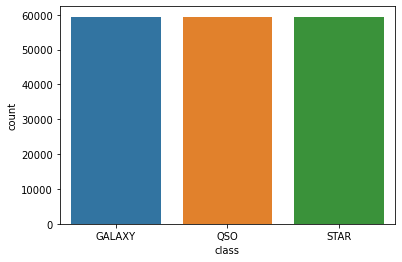

In [34]:
sns.countplot(y_smote)

## Feature Scaling

In [35]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

alpha  delta      u      r  run_ID  cam_col  field_ID  redshift  plate  \
0 -0.430  0.401  1.025  0.383  -0.440   -0.997    -0.793     0.064  0.146   
1 -0.336  0.339  1.460  1.629   0.022    0.958    -0.465     0.295  1.686   
2 -0.364  0.558  1.695  0.505  -0.440   -0.997    -0.456     0.079 -0.264   
3  1.651 -1.267  0.181  1.075  -0.143   -0.345     0.314     0.539  1.256   
4  1.718 -0.172 -1.126 -1.835   1.839   -0.345    -0.317    -0.764  0.249   

   fiber_ID    MJY  
0    -1.028  0.346  
1    -0.085  1.347  
2    -0.557 -0.076  
3     1.195  1.281  
4     1.442  0.254

## Splitting the dataset into training and test sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_smote, test_size=0.3, random_state=1)

## Model Training & Evaluation

In [37]:
logmodel = LogisticRegressionCV(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegressionCV(solver='liblinear')

[[16128  1624   165]
 [  738 16832     1]
 [    3     0 18010]]
              precision    recall  f1-score   support

      GALAXY       0.96      0.90      0.93     17917
         QSO       0.91      0.96      0.93     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.95     53501
   macro avg       0.95      0.95      0.95     53501
weighted avg       0.95      0.95      0.95     53501



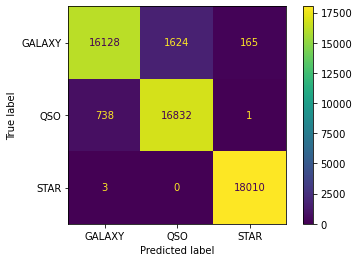

In [38]:
lr_pred = logmodel.predict(X_test)
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
plot_confusion_matrix(logmodel,X_test,y_test)

In [39]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [40]:
sgd_pred = sgd.predict(X_test)
print(classification_report(y_test,sgd_pred))

              precision    recall  f1-score   support

      GALAXY       0.93      0.83      0.88     17917
         QSO       0.90      0.96      0.93     17571
        STAR       0.94      0.97      0.96     18013

    accuracy                           0.92     53501
   macro avg       0.92      0.92      0.92     53501
weighted avg       0.92      0.92      0.92     53501



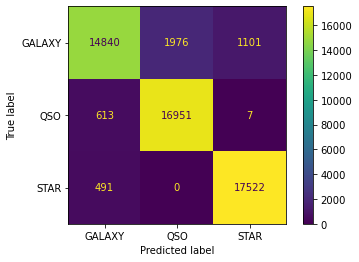

In [41]:
plot_confusion_matrix(sgd,X_test,y_test)

In [42]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

              precision    recall  f1-score   support

      GALAXY       0.87      0.82      0.84     17917
         QSO       0.85      0.94      0.89     17571
        STAR       0.98      0.94      0.96     18013

    accuracy                           0.90     53501
   macro avg       0.90      0.90      0.90     53501
weighted avg       0.90      0.90      0.90     53501



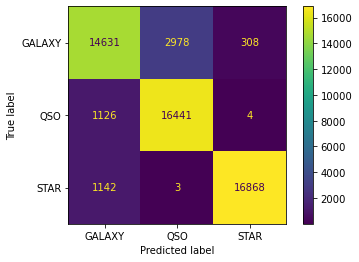

In [43]:
pac_pred = pac.predict(X_test)
print(classification_report(y_test,pac_pred))
plot_confusion_matrix(pac,X_test,y_test)

In [44]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

              precision    recall  f1-score   support

      GALAXY       0.77      0.56      0.65     17917
         QSO       0.90      0.93      0.91     17571
        STAR       0.69      0.85      0.76     18013

    accuracy                           0.78     53501
   macro avg       0.79      0.78      0.78     53501
weighted avg       0.78      0.78      0.77     53501



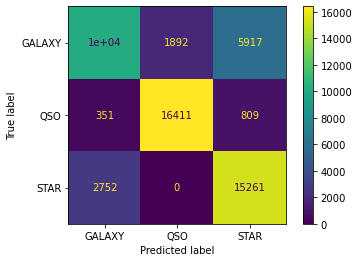

In [45]:
ridge_pred = ridge.predict(X_test)
print(classification_report(y_test,ridge_pred))
plot_confusion_matrix(ridge,X_test,y_test)

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

      GALAXY       0.92      0.91      0.92     17917
         QSO       0.97      0.95      0.96     17571
        STAR       0.94      0.96      0.95     18013

    accuracy                           0.94     53501
   macro avg       0.94      0.94      0.94     53501
weighted avg       0.94      0.94      0.94     53501



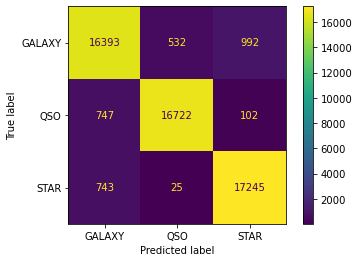

In [47]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
plot_confusion_matrix(knn,X_test,y_test)

In [48]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

              precision    recall  f1-score   support

      GALAXY       0.95      0.96      0.95     17917
         QSO       0.98      0.94      0.96     17571
        STAR       0.98      1.00      0.99     18013

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



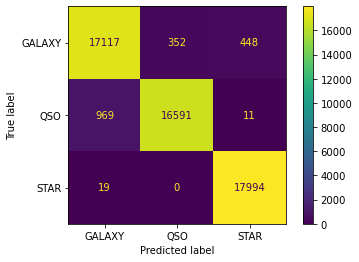

In [49]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))
plot_confusion_matrix(svm,X_test,y_test)

In [50]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

      GALAXY       0.90      0.89      0.89     17917
         QSO       0.89      0.91      0.90     17571
        STAR       0.99      0.99      0.99     18013

    accuracy                           0.93     53501
   macro avg       0.93      0.93      0.93     53501
weighted avg       0.93      0.93      0.93     53501



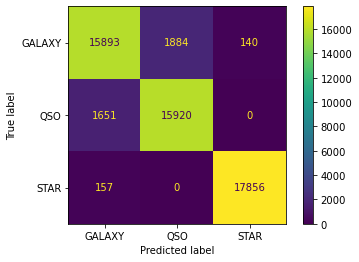

In [51]:
gnb_pred = gnb.predict(X_test)
print(classification_report(y_test,gnb_pred))
plot_confusion_matrix(gnb,X_test,y_test)

In [52]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

              precision    recall  f1-score   support

      GALAXY       0.45      0.39      0.42     17917
         QSO       0.79      0.82      0.80     17571
        STAR       0.62      0.67      0.64     18013

    accuracy                           0.63     53501
   macro avg       0.62      0.63      0.62     53501
weighted avg       0.62      0.63      0.62     53501



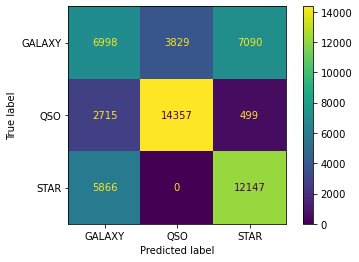

In [53]:
bnb_pred = bnb.predict(X_test)
print(classification_report(y_test,bnb_pred))
plot_confusion_matrix(bnb,X_test,y_test)

In [54]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

      GALAXY       0.95      0.94      0.95     17917
         QSO       0.95      0.95      0.95     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



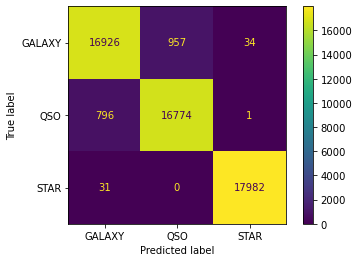

In [55]:
dtree_pred = dtree.predict(X_test)
print(classification_report(y_test,dtree_pred))
plot_confusion_matrix(dtree,X_test,y_test)

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     17917
         QSO       0.98      0.96      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



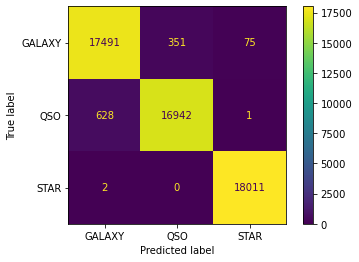

In [57]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
plot_confusion_matrix(rfc,X_test,y_test)

In [58]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

              precision    recall  f1-score   support

      GALAXY       0.46      0.74      0.56     17917
         QSO       0.28      0.10      0.14     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.62     53501
   macro avg       0.57      0.61      0.57     53501
weighted avg       0.58      0.62      0.57     53501



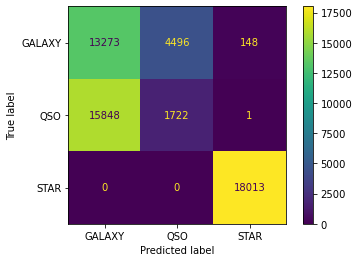

In [59]:
abc_pred = abc.predict(X_test)
print(classification_report(y_test,abc_pred))
plot_confusion_matrix(abc,X_test,y_test)

In [60]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97     17917
         QSO       0.98      0.96      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



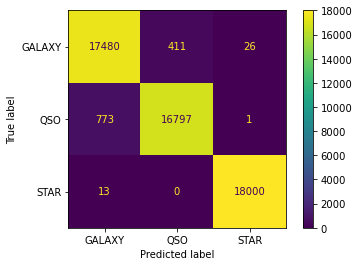

In [61]:
bag_pred = bag.predict(X_test)
print(classification_report(y_test,bag_pred))
plot_confusion_matrix(bag,X_test,y_test)

In [62]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.97     17917
         QSO       0.98      0.96      0.97     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



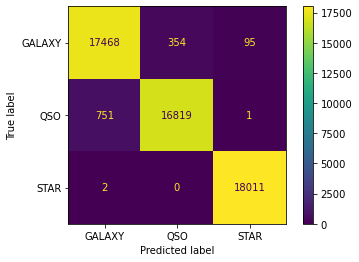

In [63]:
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test,gbc_pred))
plot_confusion_matrix(gbc,X_test,y_test)

In [64]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

              precision    recall  f1-score   support

      GALAXY       0.95      0.98      0.97     17917
         QSO       0.98      0.95      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



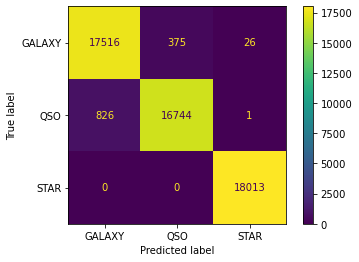

In [65]:
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test,xgb_pred))
plot_confusion_matrix(xgb,X_test,y_test)

In [66]:
hist = HistGradientBoostingClassifier()
hist.fit(X_train,y_train)

HistGradientBoostingClassifier()

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     17917
         QSO       0.98      0.97      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



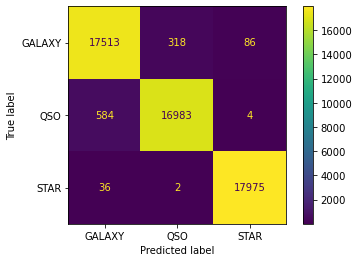

In [67]:
hist_pred = hist.predict(X_test)
print(classification_report(y_test,hist_pred))
plot_confusion_matrix(hist,X_test,y_test)

In [68]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     17917
         QSO       0.98      0.97      0.97     17571
        STAR       0.99      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



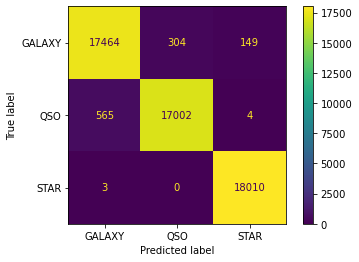

In [69]:
et_pred = et.predict(X_test)
print(classification_report(y_test,et_pred))
plot_confusion_matrix(et,X_test,y_test)

In [70]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.101213
0:	learn: 0.9303029	total: 287ms	remaining: 4m 46s
1:	learn: 0.8051890	total: 380ms	remaining: 3m 9s
2:	learn: 0.7035922	total: 476ms	remaining: 2m 38s
3:	learn: 0.6202396	total: 573ms	remaining: 2m 22s
4:	learn: 0.5554832	total: 644ms	remaining: 2m 8s
5:	learn: 0.4988817	total: 704ms	remaining: 1m 56s
6:	learn: 0.4500778	total: 757ms	remaining: 1m 47s
7:	learn: 0.4089113	total: 801ms	remaining: 1m 39s
8:	learn: 0.3732457	total: 846ms	remaining: 1m 33s
9:	learn: 0.3440138	total: 887ms	remaining: 1m 27s
10:	learn: 0.3165328	total: 932ms	remaining: 1m 23s
11:	learn: 0.2928498	total: 977ms	remaining: 1m 20s
12:	learn: 0.2724726	total: 1.02s	remaining: 1m 17s
13:	learn: 0.2538704	total: 1.06s	remaining: 1m 14s
14:	learn: 0.2372645	total: 1.11s	remaining: 1m 12s
15:	learn: 0.2225548	total: 1.15s	remaining: 1m 10s
16:	learn: 0.2100822	total: 1.19s	remaining: 1m 8s
17:	learn: 0.1987038	total: 1.23s	remaining: 1m 7s
18:	learn: 0.1885371	total: 1.28s	remaining: 1m 

163:	learn: 0.0655057	total: 8.06s	remaining: 41.1s
164:	learn: 0.0654711	total: 8.1s	remaining: 41s
165:	learn: 0.0653526	total: 8.14s	remaining: 40.9s
166:	learn: 0.0652115	total: 8.19s	remaining: 40.8s
167:	learn: 0.0650704	total: 8.23s	remaining: 40.8s
168:	learn: 0.0650095	total: 8.27s	remaining: 40.7s
169:	learn: 0.0648613	total: 8.31s	remaining: 40.6s
170:	learn: 0.0647921	total: 8.36s	remaining: 40.5s
171:	learn: 0.0647559	total: 8.39s	remaining: 40.4s
172:	learn: 0.0647335	total: 8.43s	remaining: 40.3s
173:	learn: 0.0647063	total: 8.48s	remaining: 40.2s
174:	learn: 0.0646536	total: 8.52s	remaining: 40.2s
175:	learn: 0.0646004	total: 8.56s	remaining: 40.1s
176:	learn: 0.0645368	total: 8.6s	remaining: 40s
177:	learn: 0.0645073	total: 8.63s	remaining: 39.9s
178:	learn: 0.0644725	total: 8.67s	remaining: 39.8s
179:	learn: 0.0642794	total: 8.71s	remaining: 39.7s
180:	learn: 0.0641967	total: 8.76s	remaining: 39.6s
181:	learn: 0.0640609	total: 8.8s	remaining: 39.6s
182:	learn: 0.06390

322:	learn: 0.0574131	total: 14.6s	remaining: 30.6s
323:	learn: 0.0573784	total: 14.6s	remaining: 30.5s
324:	learn: 0.0573369	total: 14.7s	remaining: 30.5s
325:	learn: 0.0573138	total: 14.7s	remaining: 30.4s
326:	learn: 0.0572701	total: 14.8s	remaining: 30.4s
327:	learn: 0.0571745	total: 14.8s	remaining: 30.3s
328:	learn: 0.0571122	total: 14.8s	remaining: 30.3s
329:	learn: 0.0570414	total: 14.9s	remaining: 30.2s
330:	learn: 0.0570222	total: 14.9s	remaining: 30.2s
331:	learn: 0.0570006	total: 15s	remaining: 30.1s
332:	learn: 0.0569818	total: 15s	remaining: 30s
333:	learn: 0.0569690	total: 15s	remaining: 30s
334:	learn: 0.0569158	total: 15.1s	remaining: 29.9s
335:	learn: 0.0568874	total: 15.1s	remaining: 29.9s
336:	learn: 0.0568514	total: 15.2s	remaining: 29.8s
337:	learn: 0.0568320	total: 15.2s	remaining: 29.8s
338:	learn: 0.0567819	total: 15.3s	remaining: 29.7s
339:	learn: 0.0567527	total: 15.3s	remaining: 29.7s
340:	learn: 0.0567290	total: 15.3s	remaining: 29.6s
341:	learn: 0.0566918	

482:	learn: 0.0528118	total: 21s	remaining: 22.5s
483:	learn: 0.0527924	total: 21s	remaining: 22.4s
484:	learn: 0.0527078	total: 21.1s	remaining: 22.4s
485:	learn: 0.0526670	total: 21.1s	remaining: 22.4s
486:	learn: 0.0526434	total: 21.2s	remaining: 22.3s
487:	learn: 0.0526364	total: 21.2s	remaining: 22.2s
488:	learn: 0.0526277	total: 21.2s	remaining: 22.2s
489:	learn: 0.0526080	total: 21.3s	remaining: 22.2s
490:	learn: 0.0525916	total: 21.3s	remaining: 22.1s
491:	learn: 0.0525525	total: 21.4s	remaining: 22.1s
492:	learn: 0.0525235	total: 21.4s	remaining: 22s
493:	learn: 0.0524932	total: 21.5s	remaining: 22s
494:	learn: 0.0524667	total: 21.5s	remaining: 21.9s
495:	learn: 0.0524524	total: 21.5s	remaining: 21.9s
496:	learn: 0.0524395	total: 21.6s	remaining: 21.8s
497:	learn: 0.0524106	total: 21.6s	remaining: 21.8s
498:	learn: 0.0523691	total: 21.7s	remaining: 21.8s
499:	learn: 0.0523290	total: 21.7s	remaining: 21.7s
500:	learn: 0.0523202	total: 21.7s	remaining: 21.7s
501:	learn: 0.052288

644:	learn: 0.0491636	total: 28s	remaining: 15.4s
645:	learn: 0.0491455	total: 28.1s	remaining: 15.4s
646:	learn: 0.0491296	total: 28.1s	remaining: 15.3s
647:	learn: 0.0490904	total: 28.2s	remaining: 15.3s
648:	learn: 0.0490561	total: 28.2s	remaining: 15.3s
649:	learn: 0.0490478	total: 28.2s	remaining: 15.2s
650:	learn: 0.0490337	total: 28.3s	remaining: 15.2s
651:	learn: 0.0490206	total: 28.3s	remaining: 15.1s
652:	learn: 0.0490072	total: 28.4s	remaining: 15.1s
653:	learn: 0.0489785	total: 28.4s	remaining: 15s
654:	learn: 0.0489531	total: 28.4s	remaining: 15s
655:	learn: 0.0489346	total: 28.5s	remaining: 14.9s
656:	learn: 0.0489107	total: 28.5s	remaining: 14.9s
657:	learn: 0.0489008	total: 28.5s	remaining: 14.8s
658:	learn: 0.0488852	total: 28.6s	remaining: 14.8s
659:	learn: 0.0488599	total: 28.6s	remaining: 14.7s
660:	learn: 0.0488445	total: 28.7s	remaining: 14.7s
661:	learn: 0.0488327	total: 28.7s	remaining: 14.7s
662:	learn: 0.0488169	total: 28.8s	remaining: 14.6s
663:	learn: 0.0488

804:	learn: 0.0462933	total: 34.4s	remaining: 8.34s
805:	learn: 0.0462800	total: 34.5s	remaining: 8.3s
806:	learn: 0.0462685	total: 34.5s	remaining: 8.26s
807:	learn: 0.0462580	total: 34.6s	remaining: 8.21s
808:	learn: 0.0462377	total: 34.6s	remaining: 8.17s
809:	learn: 0.0462300	total: 34.6s	remaining: 8.12s
810:	learn: 0.0462149	total: 34.7s	remaining: 8.08s
811:	learn: 0.0462067	total: 34.7s	remaining: 8.04s
812:	learn: 0.0461849	total: 34.8s	remaining: 8s
813:	learn: 0.0461596	total: 34.8s	remaining: 7.95s
814:	learn: 0.0461432	total: 34.9s	remaining: 7.91s
815:	learn: 0.0461335	total: 34.9s	remaining: 7.87s
816:	learn: 0.0461227	total: 34.9s	remaining: 7.83s
817:	learn: 0.0460944	total: 35s	remaining: 7.78s
818:	learn: 0.0460840	total: 35s	remaining: 7.74s
819:	learn: 0.0460751	total: 35.1s	remaining: 7.7s
820:	learn: 0.0460649	total: 35.1s	remaining: 7.65s
821:	learn: 0.0460446	total: 35.1s	remaining: 7.61s
822:	learn: 0.0460291	total: 35.2s	remaining: 7.57s
823:	learn: 0.0460188

966:	learn: 0.0437805	total: 41s	remaining: 1.4s
967:	learn: 0.0437740	total: 41.1s	remaining: 1.36s
968:	learn: 0.0437661	total: 41.1s	remaining: 1.31s
969:	learn: 0.0437384	total: 41.2s	remaining: 1.27s
970:	learn: 0.0437279	total: 41.2s	remaining: 1.23s
971:	learn: 0.0437108	total: 41.2s	remaining: 1.19s
972:	learn: 0.0437016	total: 41.3s	remaining: 1.15s
973:	learn: 0.0436856	total: 41.3s	remaining: 1.1s
974:	learn: 0.0436791	total: 41.3s	remaining: 1.06s
975:	learn: 0.0436689	total: 41.4s	remaining: 1.02s
976:	learn: 0.0436578	total: 41.4s	remaining: 975ms
977:	learn: 0.0436412	total: 41.5s	remaining: 933ms
978:	learn: 0.0436345	total: 41.5s	remaining: 890ms
979:	learn: 0.0436239	total: 41.5s	remaining: 848ms
980:	learn: 0.0436032	total: 41.6s	remaining: 805ms
981:	learn: 0.0435884	total: 41.6s	remaining: 763ms
982:	learn: 0.0435817	total: 41.7s	remaining: 721ms
983:	learn: 0.0435731	total: 41.7s	remaining: 678ms
984:	learn: 0.0435653	total: 41.7s	remaining: 636ms
985:	learn: 0.04

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     17917
         QSO       0.98      0.97      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



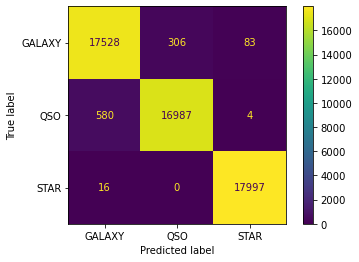

In [71]:
cat_pred = cat.predict(X_test)
print(classification_report(y_test,cat_pred))
plot_confusion_matrix(cat,X_test,y_test)

In [72]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     17917
         QSO       0.98      0.97      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



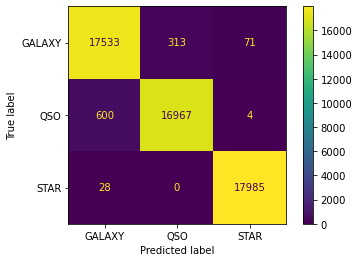

In [73]:
lgbm_pred = lgbm.predict(X_test)
print(classification_report(y_test,lgbm_pred))
plot_confusion_matrix(lgbm,X_test,y_test)

In [74]:
vc = VotingClassifier(estimators=[
    ('RF',RandomForestClassifier()),
    ('DT',DecisionTreeClassifier()),
    ('SVM',SVC()),
    ('XGB',XGBClassifier()),
    ('BAG',BaggingClassifier()),
    ('HIST',HistGradientBoostingClassifier()),
    ('GB',GradientBoostingClassifier()),
    ('LGBM',LGBMClassifier()),
    ('LR',LogisticRegressionCV(solver='liblinear')),
    ('ET',ExtraTreesClassifier())
],voting='hard')

In [75]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier()), ('SVM', SVC()),
                             ('XGB', XGBClassifier()),
                             ('BAG', BaggingClassifier()),
                             ('HIST', HistGradientBoostingClassifier()),
                             ('GB', GradientBoostingClassifier()),
                             ('LGBM', LGBMClassifier()),
                             ('LR', LogisticRegressionCV(solver='liblinear')),
                             ('ET', ExtraTreesClassifier())])

In [76]:
vc_pred = vc.predict(X_test)
print(classification_report(y_test,vc_pred))

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97     17917
         QSO       0.98      0.96      0.97     17571
        STAR       1.00      1.00      1.00     18013

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



## Performance Analysis of All Used Models

In [77]:
print("Accuracy Score of Logistic Regression CV:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifier:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Nearest Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Machines Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rfc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(hist.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cat.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light Gradient Boosting Model:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Voting Classifier:",str(np.round(vc.score(X_test,y_test)*100,2)) + '%')

Accuracy Score of Logistic Regression CV: 95.27%
Accuracy Score of Ridge Classifier: 78.09%
Accuracy Score of SGD Classifier: 92.17%
Accuracy Score of Passive Aggressive Classifier: 89.61%
Accuracy Score of K Nearest Neighbors Classifier: 94.13%
Accuracy Score of Support Vector Machines Classifier: 96.64%
Accuracy Score of Gaussian Naive Bayes: 92.84%
Accuracy Score of Bernoulli Naive Bayes: 62.62%
Accuracy Score of Decision Tree Classifier: 96.6%
Accuracy Score of Random Forest Classifier: 98.02%
Accuracy Score of XG Boost Classifier: 97.7%
Accuracy Score of Gradient Boosting Classifier: 97.75%
Accuracy Score of Histogram-based Gradient Boosting Classifier: 98.07%
Accuracy Score of Bagging Classifier: 97.71%
Accuracy Score of Ada Boost Classifier: 61.7%
Accuracy Score of Cat Boost Classifier: 98.15%
Accuracy Score of Light Gradient Boosting Model: 98.1%
Accuracy Score of Extra Trees Classifier: 98.08%
Accuracy Score of Voting Classifier: 97.93%


The best performing model is the Cat Boost Classifier which possesses an excellent prediction accuracy of more than 98%.

## Cross Validation

In [78]:
cv_dt = pd.DataFrame(cross_validate(dtree,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
cv_dt.head()

fit_time  score_time  test_accuracy  test_f1_weighted  \
0     1.050       0.207          0.961             0.962   
1     0.537       0.166          0.962             0.962   
2     0.590       0.184          0.963             0.963   
3     0.548       0.167          0.958             0.958   
4     0.587       0.193          0.962             0.962   

   test_recall_weighted  test_precision_weighted  
0                 0.961                    0.962  
1                 0.962                    0.962  
2                 0.963                    0.963  
3                 0.958                    0.958  
4                 0.962                    0.962

In [79]:
print("Mean Accuracy Score of Decision Tree Classifier:",str(np.round(cv_dt.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Decision Tree Classifier: 96.15%


In [80]:
cv_rf = pd.DataFrame(cross_val_score(rfc,X_test,y_test,scoring='accuracy',cv=RepeatedKFold(n_splits=6,n_repeats=3),verbose=1))
cv_rf.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.9min finished


0
0 0.976
1 0.976
2 0.977
3 0.977
4 0.975

In [81]:
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(cv_rf.mean()*100,2)) + '%')

Mean Accuracy Score of Random Forest Classifier: 0   97.600
dtype: float64%


In [82]:
cv_et = pd.DataFrame(cross_validate(et,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Extra Trees Classifier:",str(np.round(cv_et.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Extra Trees Classifier: 97.54%


In [83]:
cv_bag = pd.DataFrame(cross_validate(bag,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Bagging Classifier:",str(np.round(cv_bag.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Bagging Classifier: 97.33%


In [84]:
cv_xgb = pd.DataFrame(cross_validate(xgb,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of XG Boost Classifier:",str(np.round(cv_xgb.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of XG Boost Classifier: 97.2%


In [85]:
cv_cat = pd.DataFrame(cross_validate(cat,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Cat Boost Classifier:",str(np.round(cv_cat.test_accuracy.mean()*100,2)) + '%')

Learning rate set to 0.095836
0:	learn: 0.9368481	total: 48.4ms	remaining: 48.3s
1:	learn: 0.8136936	total: 62.4ms	remaining: 31.1s
2:	learn: 0.7182242	total: 77.7ms	remaining: 25.8s
3:	learn: 0.6400322	total: 91.2ms	remaining: 22.7s
4:	learn: 0.5722070	total: 105ms	remaining: 21s
5:	learn: 0.5146979	total: 120ms	remaining: 19.9s
6:	learn: 0.4665528	total: 134ms	remaining: 19.1s
7:	learn: 0.4263384	total: 148ms	remaining: 18.4s
8:	learn: 0.3911264	total: 162ms	remaining: 17.9s
9:	learn: 0.3605886	total: 180ms	remaining: 17.8s
10:	learn: 0.3338971	total: 195ms	remaining: 17.5s
11:	learn: 0.3109535	total: 207ms	remaining: 17.1s
12:	learn: 0.2892155	total: 220ms	remaining: 16.7s
13:	learn: 0.2691489	total: 236ms	remaining: 16.6s
14:	learn: 0.2516342	total: 252ms	remaining: 16.5s
15:	learn: 0.2370561	total: 266ms	remaining: 16.4s
16:	learn: 0.2229695	total: 332ms	remaining: 19.2s
17:	learn: 0.2106621	total: 356ms	remaining: 19.4s
18:	learn: 0.1996982	total: 373ms	remaining: 19.2s
19:	learn

168:	learn: 0.0675926	total: 2.88s	remaining: 14.2s
169:	learn: 0.0675370	total: 2.9s	remaining: 14.2s
170:	learn: 0.0674353	total: 2.93s	remaining: 14.2s
171:	learn: 0.0673715	total: 2.95s	remaining: 14.2s
172:	learn: 0.0673252	total: 2.98s	remaining: 14.2s
173:	learn: 0.0672879	total: 3s	remaining: 14.2s
174:	learn: 0.0672008	total: 3.02s	remaining: 14.2s
175:	learn: 0.0671428	total: 3.04s	remaining: 14.2s
176:	learn: 0.0670417	total: 3.06s	remaining: 14.2s
177:	learn: 0.0669990	total: 3.09s	remaining: 14.3s
178:	learn: 0.0669474	total: 3.11s	remaining: 14.3s
179:	learn: 0.0667022	total: 3.14s	remaining: 14.3s
180:	learn: 0.0666638	total: 3.16s	remaining: 14.3s
181:	learn: 0.0666257	total: 3.18s	remaining: 14.3s
182:	learn: 0.0665578	total: 3.2s	remaining: 14.3s
183:	learn: 0.0662826	total: 3.23s	remaining: 14.3s
184:	learn: 0.0661573	total: 3.25s	remaining: 14.3s
185:	learn: 0.0661040	total: 3.27s	remaining: 14.3s
186:	learn: 0.0660455	total: 3.29s	remaining: 14.3s
187:	learn: 0.065

327:	learn: 0.0564548	total: 5.56s	remaining: 11.4s
328:	learn: 0.0563822	total: 5.58s	remaining: 11.4s
329:	learn: 0.0563682	total: 5.61s	remaining: 11.4s
330:	learn: 0.0563539	total: 5.63s	remaining: 11.4s
331:	learn: 0.0563057	total: 5.65s	remaining: 11.4s
332:	learn: 0.0562664	total: 5.68s	remaining: 11.4s
333:	learn: 0.0562163	total: 5.7s	remaining: 11.4s
334:	learn: 0.0561689	total: 5.72s	remaining: 11.4s
335:	learn: 0.0561253	total: 5.75s	remaining: 11.4s
336:	learn: 0.0560668	total: 5.77s	remaining: 11.4s
337:	learn: 0.0560267	total: 5.79s	remaining: 11.3s
338:	learn: 0.0560086	total: 5.82s	remaining: 11.3s
339:	learn: 0.0559683	total: 5.84s	remaining: 11.3s
340:	learn: 0.0558988	total: 5.86s	remaining: 11.3s
341:	learn: 0.0558627	total: 5.88s	remaining: 11.3s
342:	learn: 0.0558214	total: 5.91s	remaining: 11.3s
343:	learn: 0.0557947	total: 5.93s	remaining: 11.3s
344:	learn: 0.0557670	total: 5.96s	remaining: 11.3s
345:	learn: 0.0557212	total: 5.98s	remaining: 11.3s
346:	learn: 0

488:	learn: 0.0503270	total: 8s	remaining: 8.36s
489:	learn: 0.0503049	total: 8.01s	remaining: 8.34s
490:	learn: 0.0502812	total: 8.03s	remaining: 8.32s
491:	learn: 0.0502227	total: 8.04s	remaining: 8.3s
492:	learn: 0.0501957	total: 8.05s	remaining: 8.28s
493:	learn: 0.0501753	total: 8.06s	remaining: 8.26s
494:	learn: 0.0500964	total: 8.08s	remaining: 8.24s
495:	learn: 0.0500745	total: 8.09s	remaining: 8.22s
496:	learn: 0.0500314	total: 8.1s	remaining: 8.2s
497:	learn: 0.0499956	total: 8.11s	remaining: 8.18s
498:	learn: 0.0499688	total: 8.13s	remaining: 8.16s
499:	learn: 0.0499491	total: 8.14s	remaining: 8.14s
500:	learn: 0.0499135	total: 8.15s	remaining: 8.12s
501:	learn: 0.0498342	total: 8.16s	remaining: 8.1s
502:	learn: 0.0497917	total: 8.19s	remaining: 8.09s
503:	learn: 0.0497584	total: 8.21s	remaining: 8.09s
504:	learn: 0.0497420	total: 8.24s	remaining: 8.07s
505:	learn: 0.0497214	total: 8.26s	remaining: 8.06s
506:	learn: 0.0497036	total: 8.28s	remaining: 8.05s
507:	learn: 0.04968

654:	learn: 0.0451840	total: 11.4s	remaining: 6.01s
655:	learn: 0.0451200	total: 11.4s	remaining: 5.99s
656:	learn: 0.0451114	total: 11.4s	remaining: 5.97s
657:	learn: 0.0450917	total: 11.5s	remaining: 5.95s
658:	learn: 0.0450500	total: 11.5s	remaining: 5.93s
659:	learn: 0.0450258	total: 11.5s	remaining: 5.91s
660:	learn: 0.0450042	total: 11.5s	remaining: 5.89s
661:	learn: 0.0449722	total: 11.5s	remaining: 5.87s
662:	learn: 0.0449501	total: 11.5s	remaining: 5.85s
663:	learn: 0.0449280	total: 11.5s	remaining: 5.83s
664:	learn: 0.0448985	total: 11.5s	remaining: 5.81s
665:	learn: 0.0448784	total: 11.5s	remaining: 5.79s
666:	learn: 0.0448575	total: 11.6s	remaining: 5.77s
667:	learn: 0.0448285	total: 11.6s	remaining: 5.75s
668:	learn: 0.0447826	total: 11.6s	remaining: 5.73s
669:	learn: 0.0447615	total: 11.6s	remaining: 5.71s
670:	learn: 0.0447381	total: 11.6s	remaining: 5.69s
671:	learn: 0.0446863	total: 11.6s	remaining: 5.67s
672:	learn: 0.0446722	total: 11.6s	remaining: 5.65s
673:	learn: 

820:	learn: 0.0411468	total: 14.9s	remaining: 3.25s
821:	learn: 0.0411158	total: 14.9s	remaining: 3.23s
822:	learn: 0.0411040	total: 14.9s	remaining: 3.21s
823:	learn: 0.0410757	total: 15s	remaining: 3.2s
824:	learn: 0.0410482	total: 15s	remaining: 3.18s
825:	learn: 0.0410319	total: 15s	remaining: 3.17s
826:	learn: 0.0410207	total: 15.1s	remaining: 3.15s
827:	learn: 0.0410149	total: 15.1s	remaining: 3.13s
828:	learn: 0.0409927	total: 15.1s	remaining: 3.12s
829:	learn: 0.0409582	total: 15.1s	remaining: 3.1s
830:	learn: 0.0409328	total: 15.2s	remaining: 3.08s
831:	learn: 0.0409263	total: 15.2s	remaining: 3.06s
832:	learn: 0.0409145	total: 15.2s	remaining: 3.05s
833:	learn: 0.0408970	total: 15.2s	remaining: 3.03s
834:	learn: 0.0408631	total: 15.2s	remaining: 3.01s
835:	learn: 0.0408341	total: 15.2s	remaining: 2.99s
836:	learn: 0.0407675	total: 15.2s	remaining: 2.97s
837:	learn: 0.0407398	total: 15.3s	remaining: 2.95s
838:	learn: 0.0407214	total: 15.3s	remaining: 2.93s
839:	learn: 0.040708

986:	learn: 0.0375756	total: 17.6s	remaining: 232ms
987:	learn: 0.0375569	total: 17.6s	remaining: 214ms
988:	learn: 0.0375404	total: 17.6s	remaining: 196ms
989:	learn: 0.0374997	total: 17.7s	remaining: 178ms
990:	learn: 0.0374698	total: 17.7s	remaining: 161ms
991:	learn: 0.0374541	total: 17.7s	remaining: 143ms
992:	learn: 0.0374458	total: 17.7s	remaining: 125ms
993:	learn: 0.0374358	total: 17.8s	remaining: 107ms
994:	learn: 0.0374150	total: 17.8s	remaining: 89.4ms
995:	learn: 0.0374052	total: 17.8s	remaining: 71.5ms
996:	learn: 0.0373925	total: 17.8s	remaining: 53.7ms
997:	learn: 0.0373795	total: 17.9s	remaining: 35.8ms
998:	learn: 0.0373432	total: 17.9s	remaining: 17.9ms
999:	learn: 0.0372939	total: 17.9s	remaining: 0us
Learning rate set to 0.095836
0:	learn: 0.9385356	total: 14.4ms	remaining: 14.4s
1:	learn: 0.8131728	total: 28.8ms	remaining: 14.4s
2:	learn: 0.7171495	total: 42.1ms	remaining: 14s
3:	learn: 0.6392595	total: 55.8ms	remaining: 13.9s
4:	learn: 0.5722211	total: 70.4ms	rem

153:	learn: 0.0681630	total: 3.04s	remaining: 16.7s
154:	learn: 0.0681166	total: 3.06s	remaining: 16.7s
155:	learn: 0.0680393	total: 3.08s	remaining: 16.7s
156:	learn: 0.0677734	total: 3.11s	remaining: 16.7s
157:	learn: 0.0675623	total: 3.14s	remaining: 16.7s
158:	learn: 0.0674850	total: 3.16s	remaining: 16.7s
159:	learn: 0.0674118	total: 3.19s	remaining: 16.7s
160:	learn: 0.0673300	total: 3.21s	remaining: 16.7s
161:	learn: 0.0672641	total: 3.23s	remaining: 16.7s
162:	learn: 0.0671774	total: 3.26s	remaining: 16.7s
163:	learn: 0.0671301	total: 3.28s	remaining: 16.7s
164:	learn: 0.0670418	total: 3.31s	remaining: 16.7s
165:	learn: 0.0668813	total: 3.33s	remaining: 16.8s
166:	learn: 0.0668048	total: 3.36s	remaining: 16.8s
167:	learn: 0.0667420	total: 3.39s	remaining: 16.8s
168:	learn: 0.0666441	total: 3.41s	remaining: 16.8s
169:	learn: 0.0664129	total: 3.44s	remaining: 16.8s
170:	learn: 0.0663302	total: 3.47s	remaining: 16.8s
171:	learn: 0.0662669	total: 3.49s	remaining: 16.8s
172:	learn: 

317:	learn: 0.0558522	total: 6.19s	remaining: 13.3s
318:	learn: 0.0557262	total: 6.22s	remaining: 13.3s
319:	learn: 0.0556874	total: 6.25s	remaining: 13.3s
320:	learn: 0.0556619	total: 6.28s	remaining: 13.3s
321:	learn: 0.0556395	total: 6.3s	remaining: 13.3s
322:	learn: 0.0555993	total: 6.33s	remaining: 13.3s
323:	learn: 0.0555346	total: 6.35s	remaining: 13.3s
324:	learn: 0.0554188	total: 6.38s	remaining: 13.3s
325:	learn: 0.0553865	total: 6.41s	remaining: 13.2s
326:	learn: 0.0553303	total: 6.43s	remaining: 13.2s
327:	learn: 0.0552873	total: 6.46s	remaining: 13.2s
328:	learn: 0.0552164	total: 6.49s	remaining: 13.2s
329:	learn: 0.0551569	total: 6.52s	remaining: 13.2s
330:	learn: 0.0550972	total: 6.55s	remaining: 13.2s
331:	learn: 0.0550586	total: 6.58s	remaining: 13.2s
332:	learn: 0.0550254	total: 6.61s	remaining: 13.2s
333:	learn: 0.0549856	total: 6.64s	remaining: 13.2s
334:	learn: 0.0549008	total: 6.67s	remaining: 13.2s
335:	learn: 0.0548829	total: 6.69s	remaining: 13.2s
336:	learn: 0

480:	learn: 0.0493069	total: 9.55s	remaining: 10.3s
481:	learn: 0.0492069	total: 9.56s	remaining: 10.3s
482:	learn: 0.0491798	total: 9.57s	remaining: 10.2s
483:	learn: 0.0491275	total: 9.59s	remaining: 10.2s
484:	learn: 0.0491053	total: 9.6s	remaining: 10.2s
485:	learn: 0.0490666	total: 9.61s	remaining: 10.2s
486:	learn: 0.0490537	total: 9.62s	remaining: 10.1s
487:	learn: 0.0490240	total: 9.64s	remaining: 10.1s
488:	learn: 0.0490087	total: 9.65s	remaining: 10.1s
489:	learn: 0.0489836	total: 9.66s	remaining: 10.1s
490:	learn: 0.0489669	total: 9.67s	remaining: 10s
491:	learn: 0.0489376	total: 9.68s	remaining: 9.99s
492:	learn: 0.0489104	total: 9.69s	remaining: 9.97s
493:	learn: 0.0488888	total: 9.71s	remaining: 9.94s
494:	learn: 0.0488544	total: 9.72s	remaining: 9.91s
495:	learn: 0.0488281	total: 9.73s	remaining: 9.89s
496:	learn: 0.0488170	total: 9.74s	remaining: 9.86s
497:	learn: 0.0487933	total: 9.76s	remaining: 9.84s
498:	learn: 0.0487526	total: 9.77s	remaining: 9.81s
499:	learn: 0.0

644:	learn: 0.0445645	total: 13s	remaining: 7.14s
645:	learn: 0.0445332	total: 13s	remaining: 7.13s
646:	learn: 0.0444974	total: 13s	remaining: 7.12s
647:	learn: 0.0444750	total: 13.1s	remaining: 7.1s
648:	learn: 0.0444175	total: 13.1s	remaining: 7.08s
649:	learn: 0.0443859	total: 13.1s	remaining: 7.07s
650:	learn: 0.0443768	total: 13.2s	remaining: 7.05s
651:	learn: 0.0443257	total: 13.2s	remaining: 7.04s
652:	learn: 0.0443001	total: 13.2s	remaining: 7.01s
653:	learn: 0.0442838	total: 13.2s	remaining: 6.99s
654:	learn: 0.0442549	total: 13.2s	remaining: 6.96s
655:	learn: 0.0442244	total: 13.2s	remaining: 6.94s
656:	learn: 0.0441820	total: 13.3s	remaining: 6.92s
657:	learn: 0.0441567	total: 13.3s	remaining: 6.89s
658:	learn: 0.0441329	total: 13.3s	remaining: 6.87s
659:	learn: 0.0441127	total: 13.3s	remaining: 6.85s
660:	learn: 0.0440986	total: 13.3s	remaining: 6.82s
661:	learn: 0.0440833	total: 13.3s	remaining: 6.8s
662:	learn: 0.0440693	total: 13.3s	remaining: 6.77s
663:	learn: 0.044045

804:	learn: 0.0405752	total: 15.8s	remaining: 3.82s
805:	learn: 0.0405582	total: 15.8s	remaining: 3.8s
806:	learn: 0.0405244	total: 15.8s	remaining: 3.79s
807:	learn: 0.0405116	total: 15.8s	remaining: 3.77s
808:	learn: 0.0404704	total: 15.9s	remaining: 3.75s
809:	learn: 0.0404493	total: 15.9s	remaining: 3.73s
810:	learn: 0.0404288	total: 15.9s	remaining: 3.71s
811:	learn: 0.0404036	total: 15.9s	remaining: 3.69s
812:	learn: 0.0403765	total: 16s	remaining: 3.67s
813:	learn: 0.0403566	total: 16s	remaining: 3.65s
814:	learn: 0.0403401	total: 16s	remaining: 3.63s
815:	learn: 0.0403275	total: 16s	remaining: 3.62s
816:	learn: 0.0403010	total: 16.1s	remaining: 3.6s
817:	learn: 0.0402702	total: 16.1s	remaining: 3.58s
818:	learn: 0.0402526	total: 16.1s	remaining: 3.56s
819:	learn: 0.0402368	total: 16.1s	remaining: 3.54s
820:	learn: 0.0402011	total: 16.2s	remaining: 3.52s
821:	learn: 0.0401673	total: 16.2s	remaining: 3.51s
822:	learn: 0.0401469	total: 16.2s	remaining: 3.49s
823:	learn: 0.0401262	

965:	learn: 0.0370001	total: 18.9s	remaining: 666ms
966:	learn: 0.0369694	total: 18.9s	remaining: 646ms
967:	learn: 0.0369491	total: 18.9s	remaining: 626ms
968:	learn: 0.0369326	total: 19s	remaining: 606ms
969:	learn: 0.0369226	total: 19s	remaining: 587ms
970:	learn: 0.0369057	total: 19s	remaining: 567ms
971:	learn: 0.0368940	total: 19s	remaining: 547ms
972:	learn: 0.0368764	total: 19s	remaining: 527ms
973:	learn: 0.0368610	total: 19s	remaining: 508ms
974:	learn: 0.0368489	total: 19s	remaining: 488ms
975:	learn: 0.0368309	total: 19s	remaining: 468ms
976:	learn: 0.0368171	total: 19.1s	remaining: 449ms
977:	learn: 0.0368035	total: 19.1s	remaining: 429ms
978:	learn: 0.0367981	total: 19.1s	remaining: 410ms
979:	learn: 0.0367870	total: 19.1s	remaining: 390ms
980:	learn: 0.0367772	total: 19.1s	remaining: 371ms
981:	learn: 0.0367508	total: 19.2s	remaining: 351ms
982:	learn: 0.0367407	total: 19.2s	remaining: 332ms
983:	learn: 0.0367165	total: 19.2s	remaining: 313ms
984:	learn: 0.0367082	total:

126:	learn: 0.0725253	total: 2.26s	remaining: 15.5s
127:	learn: 0.0722907	total: 2.28s	remaining: 15.5s
128:	learn: 0.0720231	total: 2.3s	remaining: 15.5s
129:	learn: 0.0719800	total: 2.32s	remaining: 15.5s
130:	learn: 0.0718357	total: 2.34s	remaining: 15.5s
131:	learn: 0.0717887	total: 2.36s	remaining: 15.5s
132:	learn: 0.0716972	total: 2.38s	remaining: 15.5s
133:	learn: 0.0716415	total: 2.4s	remaining: 15.5s
134:	learn: 0.0714772	total: 2.42s	remaining: 15.5s
135:	learn: 0.0713571	total: 2.45s	remaining: 15.6s
136:	learn: 0.0710138	total: 2.47s	remaining: 15.6s
137:	learn: 0.0707415	total: 2.49s	remaining: 15.6s
138:	learn: 0.0706700	total: 2.51s	remaining: 15.5s
139:	learn: 0.0705565	total: 2.53s	remaining: 15.5s
140:	learn: 0.0704816	total: 2.55s	remaining: 15.5s
141:	learn: 0.0704117	total: 2.57s	remaining: 15.5s
142:	learn: 0.0703119	total: 2.59s	remaining: 15.5s
143:	learn: 0.0702608	total: 2.61s	remaining: 15.5s
144:	learn: 0.0701122	total: 2.63s	remaining: 15.5s
145:	learn: 0.

290:	learn: 0.0586105	total: 5.14s	remaining: 12.5s
291:	learn: 0.0585933	total: 5.16s	remaining: 12.5s
292:	learn: 0.0585561	total: 5.17s	remaining: 12.5s
293:	learn: 0.0585281	total: 5.19s	remaining: 12.5s
294:	learn: 0.0585103	total: 5.21s	remaining: 12.4s
295:	learn: 0.0584597	total: 5.22s	remaining: 12.4s
296:	learn: 0.0583248	total: 5.24s	remaining: 12.4s
297:	learn: 0.0582214	total: 5.26s	remaining: 12.4s
298:	learn: 0.0581778	total: 5.27s	remaining: 12.4s
299:	learn: 0.0581091	total: 5.29s	remaining: 12.3s
300:	learn: 0.0580624	total: 5.3s	remaining: 12.3s
301:	learn: 0.0580207	total: 5.32s	remaining: 12.3s
302:	learn: 0.0579416	total: 5.33s	remaining: 12.3s
303:	learn: 0.0578374	total: 5.35s	remaining: 12.3s
304:	learn: 0.0578048	total: 5.37s	remaining: 12.2s
305:	learn: 0.0576423	total: 5.39s	remaining: 12.2s
306:	learn: 0.0575988	total: 5.4s	remaining: 12.2s
307:	learn: 0.0575728	total: 5.42s	remaining: 12.2s
308:	learn: 0.0575321	total: 5.44s	remaining: 12.2s
309:	learn: 0.

457:	learn: 0.0511301	total: 8.04s	remaining: 9.51s
458:	learn: 0.0511018	total: 8.06s	remaining: 9.5s
459:	learn: 0.0510602	total: 8.08s	remaining: 9.49s
460:	learn: 0.0510368	total: 8.1s	remaining: 9.47s
461:	learn: 0.0510054	total: 8.12s	remaining: 9.46s
462:	learn: 0.0509816	total: 8.14s	remaining: 9.44s
463:	learn: 0.0509184	total: 8.16s	remaining: 9.42s
464:	learn: 0.0509050	total: 8.17s	remaining: 9.4s
465:	learn: 0.0508729	total: 8.19s	remaining: 9.39s
466:	learn: 0.0508124	total: 8.21s	remaining: 9.37s
467:	learn: 0.0507927	total: 8.23s	remaining: 9.36s
468:	learn: 0.0507766	total: 8.25s	remaining: 9.34s
469:	learn: 0.0507539	total: 8.27s	remaining: 9.33s
470:	learn: 0.0507319	total: 8.29s	remaining: 9.31s
471:	learn: 0.0506503	total: 8.31s	remaining: 9.3s
472:	learn: 0.0505934	total: 8.33s	remaining: 9.28s
473:	learn: 0.0505752	total: 8.35s	remaining: 9.26s
474:	learn: 0.0505535	total: 8.36s	remaining: 9.24s
475:	learn: 0.0504547	total: 8.38s	remaining: 9.22s
476:	learn: 0.05

622:	learn: 0.0455694	total: 10.8s	remaining: 6.55s
623:	learn: 0.0455333	total: 10.8s	remaining: 6.54s
624:	learn: 0.0454912	total: 10.9s	remaining: 6.52s
625:	learn: 0.0454278	total: 10.9s	remaining: 6.5s
626:	learn: 0.0454101	total: 10.9s	remaining: 6.48s
627:	learn: 0.0453925	total: 10.9s	remaining: 6.46s
628:	learn: 0.0453464	total: 10.9s	remaining: 6.45s
629:	learn: 0.0453278	total: 10.9s	remaining: 6.43s
630:	learn: 0.0452956	total: 11s	remaining: 6.41s
631:	learn: 0.0452710	total: 11s	remaining: 6.39s
632:	learn: 0.0452545	total: 11s	remaining: 6.37s
633:	learn: 0.0452343	total: 11s	remaining: 6.35s
634:	learn: 0.0451825	total: 11s	remaining: 6.34s
635:	learn: 0.0451675	total: 11s	remaining: 6.32s
636:	learn: 0.0451501	total: 11.1s	remaining: 6.3s
637:	learn: 0.0451311	total: 11.1s	remaining: 6.28s
638:	learn: 0.0450983	total: 11.1s	remaining: 6.26s
639:	learn: 0.0450652	total: 11.1s	remaining: 6.25s
640:	learn: 0.0450426	total: 11.1s	remaining: 6.23s
641:	learn: 0.0450174	tota

785:	learn: 0.0414723	total: 13.5s	remaining: 3.68s
786:	learn: 0.0414503	total: 13.5s	remaining: 3.66s
787:	learn: 0.0414237	total: 13.5s	remaining: 3.64s
788:	learn: 0.0414137	total: 13.5s	remaining: 3.62s
789:	learn: 0.0414004	total: 13.6s	remaining: 3.6s
790:	learn: 0.0413715	total: 13.6s	remaining: 3.59s
791:	learn: 0.0413494	total: 13.6s	remaining: 3.57s
792:	learn: 0.0413227	total: 13.6s	remaining: 3.55s
793:	learn: 0.0413027	total: 13.6s	remaining: 3.54s
794:	learn: 0.0412839	total: 13.6s	remaining: 3.52s
795:	learn: 0.0412769	total: 13.7s	remaining: 3.5s
796:	learn: 0.0412571	total: 13.7s	remaining: 3.48s
797:	learn: 0.0412412	total: 13.7s	remaining: 3.47s
798:	learn: 0.0412232	total: 13.7s	remaining: 3.45s
799:	learn: 0.0412102	total: 13.7s	remaining: 3.43s
800:	learn: 0.0411939	total: 13.7s	remaining: 3.42s
801:	learn: 0.0411654	total: 13.8s	remaining: 3.4s
802:	learn: 0.0411267	total: 13.8s	remaining: 3.38s
803:	learn: 0.0411114	total: 13.8s	remaining: 3.36s
804:	learn: 0.0

945:	learn: 0.0381169	total: 16.2s	remaining: 922ms
946:	learn: 0.0381064	total: 16.2s	remaining: 905ms
947:	learn: 0.0380904	total: 16.2s	remaining: 888ms
948:	learn: 0.0380758	total: 16.2s	remaining: 871ms
949:	learn: 0.0380635	total: 16.2s	remaining: 854ms
950:	learn: 0.0380513	total: 16.2s	remaining: 837ms
951:	learn: 0.0380395	total: 16.3s	remaining: 820ms
952:	learn: 0.0380244	total: 16.3s	remaining: 803ms
953:	learn: 0.0380034	total: 16.3s	remaining: 785ms
954:	learn: 0.0379870	total: 16.3s	remaining: 768ms
955:	learn: 0.0379475	total: 16.3s	remaining: 751ms
956:	learn: 0.0379333	total: 16.3s	remaining: 734ms
957:	learn: 0.0379224	total: 16.4s	remaining: 717ms
958:	learn: 0.0379005	total: 16.4s	remaining: 700ms
959:	learn: 0.0378929	total: 16.4s	remaining: 683ms
960:	learn: 0.0378778	total: 16.4s	remaining: 666ms
961:	learn: 0.0378557	total: 16.4s	remaining: 648ms
962:	learn: 0.0378281	total: 16.4s	remaining: 631ms
963:	learn: 0.0378128	total: 16.4s	remaining: 614ms
964:	learn: 

115:	learn: 0.0754828	total: 2.02s	remaining: 15.4s
116:	learn: 0.0753282	total: 2.03s	remaining: 15.4s
117:	learn: 0.0752314	total: 2.05s	remaining: 15.3s
118:	learn: 0.0751054	total: 2.07s	remaining: 15.3s
119:	learn: 0.0750401	total: 2.09s	remaining: 15.3s
120:	learn: 0.0749167	total: 2.1s	remaining: 15.3s
121:	learn: 0.0748146	total: 2.12s	remaining: 15.3s
122:	learn: 0.0747565	total: 2.14s	remaining: 15.2s
123:	learn: 0.0746928	total: 2.15s	remaining: 15.2s
124:	learn: 0.0745755	total: 2.17s	remaining: 15.2s
125:	learn: 0.0744552	total: 2.19s	remaining: 15.2s
126:	learn: 0.0743596	total: 2.2s	remaining: 15.1s
127:	learn: 0.0742617	total: 2.22s	remaining: 15.1s
128:	learn: 0.0741461	total: 2.24s	remaining: 15.1s
129:	learn: 0.0740602	total: 2.25s	remaining: 15.1s
130:	learn: 0.0738130	total: 2.27s	remaining: 15.1s
131:	learn: 0.0733753	total: 2.29s	remaining: 15s
132:	learn: 0.0733175	total: 2.3s	remaining: 15s
133:	learn: 0.0732544	total: 2.31s	remaining: 15s
134:	learn: 0.0731644

277:	learn: 0.0608066	total: 4.66s	remaining: 12.1s
278:	learn: 0.0607729	total: 4.67s	remaining: 12.1s
279:	learn: 0.0607159	total: 4.69s	remaining: 12.1s
280:	learn: 0.0606580	total: 4.7s	remaining: 12s
281:	learn: 0.0605979	total: 4.72s	remaining: 12s
282:	learn: 0.0605515	total: 4.73s	remaining: 12s
283:	learn: 0.0605113	total: 4.75s	remaining: 12s
284:	learn: 0.0604546	total: 4.76s	remaining: 11.9s
285:	learn: 0.0603933	total: 4.78s	remaining: 11.9s
286:	learn: 0.0603335	total: 4.8s	remaining: 11.9s
287:	learn: 0.0602329	total: 4.81s	remaining: 11.9s
288:	learn: 0.0601715	total: 4.83s	remaining: 11.9s
289:	learn: 0.0601318	total: 4.84s	remaining: 11.9s
290:	learn: 0.0601105	total: 4.86s	remaining: 11.8s
291:	learn: 0.0600262	total: 4.88s	remaining: 11.8s
292:	learn: 0.0599552	total: 4.9s	remaining: 11.8s
293:	learn: 0.0599289	total: 4.92s	remaining: 11.8s
294:	learn: 0.0598899	total: 4.93s	remaining: 11.8s
295:	learn: 0.0598519	total: 4.95s	remaining: 11.8s
296:	learn: 0.0598095	t

440:	learn: 0.0529450	total: 7.3s	remaining: 9.26s
441:	learn: 0.0529181	total: 7.32s	remaining: 9.24s
442:	learn: 0.0528577	total: 7.33s	remaining: 9.22s
443:	learn: 0.0527831	total: 7.35s	remaining: 9.21s
444:	learn: 0.0527559	total: 7.37s	remaining: 9.19s
445:	learn: 0.0527149	total: 7.38s	remaining: 9.17s
446:	learn: 0.0527006	total: 7.4s	remaining: 9.15s
447:	learn: 0.0526733	total: 7.41s	remaining: 9.13s
448:	learn: 0.0526538	total: 7.43s	remaining: 9.12s
449:	learn: 0.0526268	total: 7.44s	remaining: 9.1s
450:	learn: 0.0525936	total: 7.46s	remaining: 9.08s
451:	learn: 0.0525689	total: 7.47s	remaining: 9.06s
452:	learn: 0.0525426	total: 7.49s	remaining: 9.04s
453:	learn: 0.0525249	total: 7.5s	remaining: 9.03s
454:	learn: 0.0525002	total: 7.52s	remaining: 9.01s
455:	learn: 0.0524561	total: 7.54s	remaining: 9s
456:	learn: 0.0524268	total: 7.56s	remaining: 8.98s
457:	learn: 0.0523681	total: 7.58s	remaining: 8.97s
458:	learn: 0.0523397	total: 7.59s	remaining: 8.95s
459:	learn: 0.05232

605:	learn: 0.0479225	total: 9.97s	remaining: 6.48s
606:	learn: 0.0478940	total: 9.99s	remaining: 6.47s
607:	learn: 0.0478792	total: 10s	remaining: 6.45s
608:	learn: 0.0478569	total: 10s	remaining: 6.43s
609:	learn: 0.0478416	total: 10s	remaining: 6.42s
610:	learn: 0.0478248	total: 10.1s	remaining: 6.4s
611:	learn: 0.0477960	total: 10.1s	remaining: 6.39s
612:	learn: 0.0477880	total: 10.1s	remaining: 6.37s
613:	learn: 0.0477442	total: 10.1s	remaining: 6.35s
614:	learn: 0.0477179	total: 10.1s	remaining: 6.33s
615:	learn: 0.0476966	total: 10.1s	remaining: 6.32s
616:	learn: 0.0476706	total: 10.2s	remaining: 6.3s
617:	learn: 0.0475997	total: 10.2s	remaining: 6.29s
618:	learn: 0.0475794	total: 10.2s	remaining: 6.27s
619:	learn: 0.0475244	total: 10.2s	remaining: 6.25s
620:	learn: 0.0474728	total: 10.2s	remaining: 6.24s
621:	learn: 0.0474410	total: 10.2s	remaining: 6.22s
622:	learn: 0.0473823	total: 10.3s	remaining: 6.2s
623:	learn: 0.0473649	total: 10.3s	remaining: 6.19s
624:	learn: 0.0473475

767:	learn: 0.0439670	total: 12.6s	remaining: 3.8s
768:	learn: 0.0439592	total: 12.6s	remaining: 3.78s
769:	learn: 0.0439355	total: 12.6s	remaining: 3.77s
770:	learn: 0.0439181	total: 12.6s	remaining: 3.75s
771:	learn: 0.0438881	total: 12.6s	remaining: 3.73s
772:	learn: 0.0438504	total: 12.7s	remaining: 3.72s
773:	learn: 0.0438195	total: 12.7s	remaining: 3.7s
774:	learn: 0.0438045	total: 12.7s	remaining: 3.68s
775:	learn: 0.0437946	total: 12.7s	remaining: 3.67s
776:	learn: 0.0437805	total: 12.7s	remaining: 3.65s
777:	learn: 0.0437447	total: 12.7s	remaining: 3.63s
778:	learn: 0.0437210	total: 12.8s	remaining: 3.62s
779:	learn: 0.0437017	total: 12.8s	remaining: 3.6s
780:	learn: 0.0436755	total: 12.8s	remaining: 3.58s
781:	learn: 0.0436504	total: 12.8s	remaining: 3.57s
782:	learn: 0.0436289	total: 12.8s	remaining: 3.55s
783:	learn: 0.0436041	total: 12.8s	remaining: 3.53s
784:	learn: 0.0435831	total: 12.8s	remaining: 3.52s
785:	learn: 0.0435369	total: 12.9s	remaining: 3.5s
786:	learn: 0.04

929:	learn: 0.0401677	total: 15.2s	remaining: 1.15s
930:	learn: 0.0401598	total: 15.2s	remaining: 1.13s
931:	learn: 0.0401527	total: 15.2s	remaining: 1.11s
932:	learn: 0.0401452	total: 15.3s	remaining: 1.1s
933:	learn: 0.0401085	total: 15.3s	remaining: 1.08s
934:	learn: 0.0400847	total: 15.3s	remaining: 1.06s
935:	learn: 0.0400701	total: 15.3s	remaining: 1.05s
936:	learn: 0.0400529	total: 15.3s	remaining: 1.03s
937:	learn: 0.0400327	total: 15.3s	remaining: 1.01s
938:	learn: 0.0400059	total: 15.4s	remaining: 998ms
939:	learn: 0.0399954	total: 15.4s	remaining: 981ms
940:	learn: 0.0399741	total: 15.4s	remaining: 965ms
941:	learn: 0.0399431	total: 15.4s	remaining: 948ms
942:	learn: 0.0399224	total: 15.4s	remaining: 932ms
943:	learn: 0.0398630	total: 15.4s	remaining: 916ms
944:	learn: 0.0398530	total: 15.5s	remaining: 900ms
945:	learn: 0.0398354	total: 15.5s	remaining: 884ms
946:	learn: 0.0398104	total: 15.5s	remaining: 867ms
947:	learn: 0.0397894	total: 15.5s	remaining: 851ms
948:	learn: 0

97:	learn: 0.0787839	total: 1.62s	remaining: 14.9s
98:	learn: 0.0784363	total: 1.63s	remaining: 14.9s
99:	learn: 0.0783061	total: 1.65s	remaining: 14.9s
100:	learn: 0.0779812	total: 1.67s	remaining: 14.8s
101:	learn: 0.0776505	total: 1.68s	remaining: 14.8s
102:	learn: 0.0773036	total: 1.7s	remaining: 14.8s
103:	learn: 0.0771491	total: 1.71s	remaining: 14.8s
104:	learn: 0.0770760	total: 1.73s	remaining: 14.8s
105:	learn: 0.0768752	total: 1.75s	remaining: 14.7s
106:	learn: 0.0767600	total: 1.76s	remaining: 14.7s
107:	learn: 0.0766881	total: 1.77s	remaining: 14.7s
108:	learn: 0.0766257	total: 1.79s	remaining: 14.6s
109:	learn: 0.0765005	total: 1.81s	remaining: 14.6s
110:	learn: 0.0761673	total: 1.83s	remaining: 14.6s
111:	learn: 0.0760536	total: 1.84s	remaining: 14.6s
112:	learn: 0.0756145	total: 1.86s	remaining: 14.6s
113:	learn: 0.0752170	total: 1.88s	remaining: 14.6s
114:	learn: 0.0751398	total: 1.89s	remaining: 14.5s
115:	learn: 0.0750802	total: 1.9s	remaining: 14.5s
116:	learn: 0.075

260:	learn: 0.0616147	total: 4.28s	remaining: 12.1s
261:	learn: 0.0614667	total: 4.3s	remaining: 12.1s
262:	learn: 0.0614049	total: 4.31s	remaining: 12.1s
263:	learn: 0.0612148	total: 4.33s	remaining: 12.1s
264:	learn: 0.0611413	total: 4.35s	remaining: 12.1s
265:	learn: 0.0611155	total: 4.36s	remaining: 12s
266:	learn: 0.0609916	total: 4.38s	remaining: 12s
267:	learn: 0.0609480	total: 4.4s	remaining: 12s
268:	learn: 0.0608711	total: 4.41s	remaining: 12s
269:	learn: 0.0608136	total: 4.43s	remaining: 12s
270:	learn: 0.0606596	total: 4.45s	remaining: 12s
271:	learn: 0.0606205	total: 4.47s	remaining: 12s
272:	learn: 0.0606011	total: 4.49s	remaining: 11.9s
273:	learn: 0.0605473	total: 4.5s	remaining: 11.9s
274:	learn: 0.0604763	total: 4.52s	remaining: 11.9s
275:	learn: 0.0604442	total: 4.54s	remaining: 11.9s
276:	learn: 0.0603722	total: 4.55s	remaining: 11.9s
277:	learn: 0.0603369	total: 4.57s	remaining: 11.9s
278:	learn: 0.0602240	total: 4.58s	remaining: 11.8s
279:	learn: 0.0601287	total: 

425:	learn: 0.0527027	total: 6.96s	remaining: 9.38s
426:	learn: 0.0526755	total: 6.98s	remaining: 9.36s
427:	learn: 0.0526316	total: 6.99s	remaining: 9.35s
428:	learn: 0.0526029	total: 7.01s	remaining: 9.33s
429:	learn: 0.0525678	total: 7.03s	remaining: 9.31s
430:	learn: 0.0525470	total: 7.04s	remaining: 9.29s
431:	learn: 0.0525231	total: 7.06s	remaining: 9.28s
432:	learn: 0.0524935	total: 7.07s	remaining: 9.26s
433:	learn: 0.0524596	total: 7.09s	remaining: 9.24s
434:	learn: 0.0524479	total: 7.1s	remaining: 9.22s
435:	learn: 0.0524102	total: 7.12s	remaining: 9.21s
436:	learn: 0.0523809	total: 7.13s	remaining: 9.19s
437:	learn: 0.0523387	total: 7.15s	remaining: 9.17s
438:	learn: 0.0522977	total: 7.17s	remaining: 9.16s
439:	learn: 0.0522364	total: 7.18s	remaining: 9.14s
440:	learn: 0.0521890	total: 7.2s	remaining: 9.13s
441:	learn: 0.0521585	total: 7.21s	remaining: 9.11s
442:	learn: 0.0520861	total: 7.23s	remaining: 9.09s
443:	learn: 0.0520534	total: 7.25s	remaining: 9.07s
444:	learn: 0.

584:	learn: 0.0469345	total: 9.59s	remaining: 6.8s
585:	learn: 0.0469103	total: 9.61s	remaining: 6.79s
586:	learn: 0.0468921	total: 9.62s	remaining: 6.77s
587:	learn: 0.0468640	total: 9.64s	remaining: 6.75s
588:	learn: 0.0468057	total: 9.65s	remaining: 6.74s
589:	learn: 0.0467845	total: 9.67s	remaining: 6.72s
590:	learn: 0.0467467	total: 9.69s	remaining: 6.7s
591:	learn: 0.0467158	total: 9.7s	remaining: 6.69s
592:	learn: 0.0467047	total: 9.72s	remaining: 6.67s
593:	learn: 0.0466362	total: 9.73s	remaining: 6.65s
594:	learn: 0.0466171	total: 9.75s	remaining: 6.63s
595:	learn: 0.0465805	total: 9.76s	remaining: 6.62s
596:	learn: 0.0465474	total: 9.78s	remaining: 6.6s
597:	learn: 0.0465286	total: 9.8s	remaining: 6.59s
598:	learn: 0.0465084	total: 9.81s	remaining: 6.57s
599:	learn: 0.0464847	total: 9.83s	remaining: 6.55s
600:	learn: 0.0464644	total: 9.85s	remaining: 6.54s
601:	learn: 0.0464437	total: 9.86s	remaining: 6.52s
602:	learn: 0.0464100	total: 9.88s	remaining: 6.5s
603:	learn: 0.0463

746:	learn: 0.0425662	total: 12.3s	remaining: 4.15s
747:	learn: 0.0425523	total: 12.3s	remaining: 4.13s
748:	learn: 0.0425362	total: 12.3s	remaining: 4.12s
749:	learn: 0.0425247	total: 12.3s	remaining: 4.1s
750:	learn: 0.0424917	total: 12.3s	remaining: 4.09s
751:	learn: 0.0424749	total: 12.3s	remaining: 4.07s
752:	learn: 0.0424547	total: 12.4s	remaining: 4.05s
753:	learn: 0.0424346	total: 12.4s	remaining: 4.04s
754:	learn: 0.0424030	total: 12.4s	remaining: 4.02s
755:	learn: 0.0423820	total: 12.4s	remaining: 4s
756:	learn: 0.0423551	total: 12.4s	remaining: 3.99s
757:	learn: 0.0423180	total: 12.4s	remaining: 3.97s
758:	learn: 0.0422875	total: 12.5s	remaining: 3.95s
759:	learn: 0.0422535	total: 12.5s	remaining: 3.94s
760:	learn: 0.0422304	total: 12.5s	remaining: 3.92s
761:	learn: 0.0422082	total: 12.5s	remaining: 3.9s
762:	learn: 0.0421912	total: 12.5s	remaining: 3.89s
763:	learn: 0.0421649	total: 12.5s	remaining: 3.87s
764:	learn: 0.0421535	total: 12.6s	remaining: 3.85s
765:	learn: 0.042

910:	learn: 0.0387633	total: 14.9s	remaining: 1.46s
911:	learn: 0.0387450	total: 14.9s	remaining: 1.44s
912:	learn: 0.0387213	total: 15s	remaining: 1.43s
913:	learn: 0.0386992	total: 15s	remaining: 1.41s
914:	learn: 0.0386855	total: 15s	remaining: 1.39s
915:	learn: 0.0386569	total: 15s	remaining: 1.38s
916:	learn: 0.0386329	total: 15s	remaining: 1.36s
917:	learn: 0.0386020	total: 15s	remaining: 1.34s
918:	learn: 0.0385800	total: 15.1s	remaining: 1.33s
919:	learn: 0.0385627	total: 15.1s	remaining: 1.31s
920:	learn: 0.0385330	total: 15.1s	remaining: 1.29s
921:	learn: 0.0385148	total: 15.1s	remaining: 1.28s
922:	learn: 0.0384889	total: 15.1s	remaining: 1.26s
923:	learn: 0.0384612	total: 15.1s	remaining: 1.24s
924:	learn: 0.0384227	total: 15.2s	remaining: 1.23s
925:	learn: 0.0383982	total: 15.2s	remaining: 1.21s
926:	learn: 0.0383905	total: 15.2s	remaining: 1.2s
927:	learn: 0.0383746	total: 15.2s	remaining: 1.18s
928:	learn: 0.0383480	total: 15.2s	remaining: 1.16s
929:	learn: 0.0383207	tot

81:	learn: 0.0789402	total: 1.4s	remaining: 15.7s
82:	learn: 0.0787784	total: 1.42s	remaining: 15.7s
83:	learn: 0.0783545	total: 1.44s	remaining: 15.7s
84:	learn: 0.0778332	total: 1.45s	remaining: 15.7s
85:	learn: 0.0776986	total: 1.47s	remaining: 15.6s
86:	learn: 0.0772777	total: 1.49s	remaining: 15.6s
87:	learn: 0.0771800	total: 1.5s	remaining: 15.6s
88:	learn: 0.0770797	total: 1.52s	remaining: 15.5s
89:	learn: 0.0768111	total: 1.53s	remaining: 15.5s
90:	learn: 0.0766946	total: 1.55s	remaining: 15.5s
91:	learn: 0.0763517	total: 1.56s	remaining: 15.4s
92:	learn: 0.0758333	total: 1.58s	remaining: 15.4s
93:	learn: 0.0753847	total: 1.6s	remaining: 15.4s
94:	learn: 0.0752935	total: 1.62s	remaining: 15.4s
95:	learn: 0.0750421	total: 1.64s	remaining: 15.4s
96:	learn: 0.0749781	total: 1.65s	remaining: 15.4s
97:	learn: 0.0748478	total: 1.67s	remaining: 15.3s
98:	learn: 0.0746898	total: 1.68s	remaining: 15.3s
99:	learn: 0.0746187	total: 1.7s	remaining: 15.3s
100:	learn: 0.0744509	total: 1.72s	

243:	learn: 0.0599607	total: 4.07s	remaining: 12.6s
244:	learn: 0.0599251	total: 4.08s	remaining: 12.6s
245:	learn: 0.0598952	total: 4.1s	remaining: 12.6s
246:	learn: 0.0598510	total: 4.11s	remaining: 12.5s
247:	learn: 0.0598198	total: 4.13s	remaining: 12.5s
248:	learn: 0.0597805	total: 4.14s	remaining: 12.5s
249:	learn: 0.0597374	total: 4.16s	remaining: 12.5s
250:	learn: 0.0596943	total: 4.17s	remaining: 12.5s
251:	learn: 0.0596608	total: 4.19s	remaining: 12.4s
252:	learn: 0.0596217	total: 4.2s	remaining: 12.4s
253:	learn: 0.0595849	total: 4.22s	remaining: 12.4s
254:	learn: 0.0594191	total: 4.23s	remaining: 12.4s
255:	learn: 0.0593540	total: 4.25s	remaining: 12.4s
256:	learn: 0.0593228	total: 4.27s	remaining: 12.3s
257:	learn: 0.0592965	total: 4.28s	remaining: 12.3s
258:	learn: 0.0592234	total: 4.3s	remaining: 12.3s
259:	learn: 0.0592061	total: 4.31s	remaining: 12.3s
260:	learn: 0.0591749	total: 4.33s	remaining: 12.3s
261:	learn: 0.0590655	total: 4.35s	remaining: 12.3s
262:	learn: 0.0

409:	learn: 0.0517745	total: 6.74s	remaining: 9.7s
410:	learn: 0.0517584	total: 6.76s	remaining: 9.69s
411:	learn: 0.0517204	total: 6.78s	remaining: 9.67s
412:	learn: 0.0516680	total: 6.79s	remaining: 9.66s
413:	learn: 0.0516369	total: 6.81s	remaining: 9.64s
414:	learn: 0.0516081	total: 6.83s	remaining: 9.63s
415:	learn: 0.0515956	total: 6.85s	remaining: 9.61s
416:	learn: 0.0515556	total: 6.86s	remaining: 9.6s
417:	learn: 0.0515302	total: 6.88s	remaining: 9.57s
418:	learn: 0.0515111	total: 6.89s	remaining: 9.55s
419:	learn: 0.0513917	total: 6.91s	remaining: 9.54s
420:	learn: 0.0513738	total: 6.92s	remaining: 9.52s
421:	learn: 0.0513406	total: 6.94s	remaining: 9.5s
422:	learn: 0.0512948	total: 6.95s	remaining: 9.48s
423:	learn: 0.0512656	total: 6.97s	remaining: 9.47s
424:	learn: 0.0512125	total: 6.99s	remaining: 9.45s
425:	learn: 0.0511507	total: 7s	remaining: 9.44s
426:	learn: 0.0511246	total: 7.02s	remaining: 9.42s
427:	learn: 0.0510818	total: 7.04s	remaining: 9.4s
428:	learn: 0.05105

571:	learn: 0.0463314	total: 9.36s	remaining: 7s
572:	learn: 0.0463102	total: 9.37s	remaining: 6.98s
573:	learn: 0.0462737	total: 9.39s	remaining: 6.97s
574:	learn: 0.0462430	total: 9.4s	remaining: 6.95s
575:	learn: 0.0462127	total: 9.42s	remaining: 6.93s
576:	learn: 0.0461713	total: 9.43s	remaining: 6.92s
577:	learn: 0.0461165	total: 9.45s	remaining: 6.9s
578:	learn: 0.0460529	total: 9.47s	remaining: 6.88s
579:	learn: 0.0460232	total: 9.48s	remaining: 6.87s
580:	learn: 0.0460090	total: 9.5s	remaining: 6.85s
581:	learn: 0.0459681	total: 9.51s	remaining: 6.83s
582:	learn: 0.0459564	total: 9.53s	remaining: 6.81s
583:	learn: 0.0459167	total: 9.54s	remaining: 6.8s
584:	learn: 0.0458916	total: 9.56s	remaining: 6.78s
585:	learn: 0.0458832	total: 9.58s	remaining: 6.77s
586:	learn: 0.0458386	total: 9.59s	remaining: 6.75s
587:	learn: 0.0458128	total: 9.61s	remaining: 6.73s
588:	learn: 0.0457984	total: 9.62s	remaining: 6.72s
589:	learn: 0.0457580	total: 9.64s	remaining: 6.7s
590:	learn: 0.045700

742:	learn: 0.0418808	total: 12.2s	remaining: 4.21s
743:	learn: 0.0418548	total: 12.2s	remaining: 4.19s
744:	learn: 0.0418283	total: 12.2s	remaining: 4.17s
745:	learn: 0.0418104	total: 12.2s	remaining: 4.16s
746:	learn: 0.0417989	total: 12.2s	remaining: 4.14s
747:	learn: 0.0417789	total: 12.3s	remaining: 4.13s
748:	learn: 0.0417648	total: 12.3s	remaining: 4.11s
749:	learn: 0.0417032	total: 12.3s	remaining: 4.1s
750:	learn: 0.0416682	total: 12.3s	remaining: 4.08s
751:	learn: 0.0416626	total: 12.3s	remaining: 4.06s
752:	learn: 0.0416511	total: 12.3s	remaining: 4.05s
753:	learn: 0.0416074	total: 12.4s	remaining: 4.03s
754:	learn: 0.0415897	total: 12.4s	remaining: 4.01s
755:	learn: 0.0415781	total: 12.4s	remaining: 4s
756:	learn: 0.0415639	total: 12.4s	remaining: 3.98s
757:	learn: 0.0415486	total: 12.4s	remaining: 3.97s
758:	learn: 0.0415253	total: 12.4s	remaining: 3.95s
759:	learn: 0.0415205	total: 12.5s	remaining: 3.93s
760:	learn: 0.0415096	total: 12.5s	remaining: 3.92s
761:	learn: 0.04

902:	learn: 0.0382215	total: 14.8s	remaining: 1.59s
903:	learn: 0.0382103	total: 14.8s	remaining: 1.57s
904:	learn: 0.0381931	total: 14.8s	remaining: 1.55s
905:	learn: 0.0381738	total: 14.8s	remaining: 1.54s
906:	learn: 0.0381505	total: 14.8s	remaining: 1.52s
907:	learn: 0.0381138	total: 14.9s	remaining: 1.51s
908:	learn: 0.0380802	total: 14.9s	remaining: 1.49s
909:	learn: 0.0380688	total: 14.9s	remaining: 1.47s
910:	learn: 0.0380443	total: 14.9s	remaining: 1.46s
911:	learn: 0.0380234	total: 14.9s	remaining: 1.44s
912:	learn: 0.0379999	total: 14.9s	remaining: 1.42s
913:	learn: 0.0379879	total: 15s	remaining: 1.41s
914:	learn: 0.0379663	total: 15s	remaining: 1.39s
915:	learn: 0.0379467	total: 15s	remaining: 1.38s
916:	learn: 0.0379254	total: 15s	remaining: 1.36s
917:	learn: 0.0379063	total: 15s	remaining: 1.34s
918:	learn: 0.0378766	total: 15s	remaining: 1.33s
919:	learn: 0.0378587	total: 15.1s	remaining: 1.31s
920:	learn: 0.0378526	total: 15.1s	remaining: 1.29s
921:	learn: 0.0378154	to

71:	learn: 0.0856830	total: 1.23s	remaining: 15.8s
72:	learn: 0.0853577	total: 1.24s	remaining: 15.8s
73:	learn: 0.0849101	total: 1.26s	remaining: 15.7s
74:	learn: 0.0847975	total: 1.27s	remaining: 15.7s
75:	learn: 0.0844361	total: 1.29s	remaining: 15.7s
76:	learn: 0.0841659	total: 1.31s	remaining: 15.7s
77:	learn: 0.0835980	total: 1.32s	remaining: 15.7s
78:	learn: 0.0832128	total: 1.34s	remaining: 15.6s
79:	learn: 0.0830658	total: 1.36s	remaining: 15.6s
80:	learn: 0.0825946	total: 1.38s	remaining: 15.6s
81:	learn: 0.0824375	total: 1.4s	remaining: 15.6s
82:	learn: 0.0822721	total: 1.41s	remaining: 15.6s
83:	learn: 0.0820855	total: 1.43s	remaining: 15.6s
84:	learn: 0.0817656	total: 1.45s	remaining: 15.6s
85:	learn: 0.0816480	total: 1.46s	remaining: 15.6s
86:	learn: 0.0812104	total: 1.48s	remaining: 15.5s
87:	learn: 0.0810584	total: 1.5s	remaining: 15.5s
88:	learn: 0.0807771	total: 1.51s	remaining: 15.5s
89:	learn: 0.0804653	total: 1.53s	remaining: 15.5s
90:	learn: 0.0801826	total: 1.55s

240:	learn: 0.0633405	total: 4.14s	remaining: 13s
241:	learn: 0.0633184	total: 4.16s	remaining: 13s
242:	learn: 0.0632690	total: 4.18s	remaining: 13s
243:	learn: 0.0631396	total: 4.2s	remaining: 13s
244:	learn: 0.0631177	total: 4.21s	remaining: 13s
245:	learn: 0.0630864	total: 4.23s	remaining: 13s
246:	learn: 0.0630306	total: 4.25s	remaining: 13s
247:	learn: 0.0628720	total: 4.27s	remaining: 12.9s
248:	learn: 0.0628529	total: 4.29s	remaining: 12.9s
249:	learn: 0.0627929	total: 4.31s	remaining: 12.9s
250:	learn: 0.0627590	total: 4.33s	remaining: 12.9s
251:	learn: 0.0625801	total: 4.37s	remaining: 13s
252:	learn: 0.0625156	total: 4.38s	remaining: 12.9s
253:	learn: 0.0624844	total: 4.4s	remaining: 12.9s
254:	learn: 0.0623803	total: 4.42s	remaining: 12.9s
255:	learn: 0.0622527	total: 4.43s	remaining: 12.9s
256:	learn: 0.0621813	total: 4.45s	remaining: 12.9s
257:	learn: 0.0621194	total: 4.46s	remaining: 12.8s
258:	learn: 0.0620607	total: 4.48s	remaining: 12.8s
259:	learn: 0.0620373	total: 4

400:	learn: 0.0547013	total: 6.83s	remaining: 10.2s
401:	learn: 0.0546538	total: 6.84s	remaining: 10.2s
402:	learn: 0.0546334	total: 6.86s	remaining: 10.2s
403:	learn: 0.0545999	total: 6.88s	remaining: 10.1s
404:	learn: 0.0545516	total: 6.89s	remaining: 10.1s
405:	learn: 0.0545306	total: 6.91s	remaining: 10.1s
406:	learn: 0.0544922	total: 6.92s	remaining: 10.1s
407:	learn: 0.0544729	total: 6.94s	remaining: 10.1s
408:	learn: 0.0544512	total: 6.95s	remaining: 10s
409:	learn: 0.0544077	total: 6.97s	remaining: 10s
410:	learn: 0.0543698	total: 6.99s	remaining: 10s
411:	learn: 0.0543192	total: 7.01s	remaining: 10s
412:	learn: 0.0542806	total: 7.02s	remaining: 9.98s
413:	learn: 0.0542135	total: 7.04s	remaining: 9.97s
414:	learn: 0.0541679	total: 7.06s	remaining: 9.95s
415:	learn: 0.0541412	total: 7.08s	remaining: 9.94s
416:	learn: 0.0540985	total: 7.09s	remaining: 9.92s
417:	learn: 0.0540043	total: 7.11s	remaining: 9.9s
418:	learn: 0.0539558	total: 7.13s	remaining: 9.89s
419:	learn: 0.0538615

564:	learn: 0.0486640	total: 9.47s	remaining: 7.29s
565:	learn: 0.0486270	total: 9.49s	remaining: 7.28s
566:	learn: 0.0485846	total: 9.51s	remaining: 7.26s
567:	learn: 0.0485544	total: 9.52s	remaining: 7.24s
568:	learn: 0.0485293	total: 9.54s	remaining: 7.22s
569:	learn: 0.0485086	total: 9.55s	remaining: 7.21s
570:	learn: 0.0484729	total: 9.57s	remaining: 7.19s
571:	learn: 0.0484186	total: 9.59s	remaining: 7.17s
572:	learn: 0.0483959	total: 9.61s	remaining: 7.16s
573:	learn: 0.0483708	total: 9.62s	remaining: 7.14s
574:	learn: 0.0483524	total: 9.64s	remaining: 7.12s
575:	learn: 0.0482968	total: 9.65s	remaining: 7.11s
576:	learn: 0.0482626	total: 9.67s	remaining: 7.09s
577:	learn: 0.0482337	total: 9.69s	remaining: 7.07s
578:	learn: 0.0482237	total: 9.7s	remaining: 7.05s
579:	learn: 0.0481970	total: 9.72s	remaining: 7.04s
580:	learn: 0.0481651	total: 9.73s	remaining: 7.02s
581:	learn: 0.0481278	total: 9.75s	remaining: 7s
582:	learn: 0.0480991	total: 9.77s	remaining: 6.99s
583:	learn: 0.04

727:	learn: 0.0439959	total: 12.1s	remaining: 4.53s
728:	learn: 0.0439825	total: 12.1s	remaining: 4.51s
729:	learn: 0.0439548	total: 12.2s	remaining: 4.5s
730:	learn: 0.0439349	total: 12.2s	remaining: 4.48s
731:	learn: 0.0439234	total: 12.2s	remaining: 4.46s
732:	learn: 0.0438778	total: 12.2s	remaining: 4.44s
733:	learn: 0.0438658	total: 12.2s	remaining: 4.43s
734:	learn: 0.0438494	total: 12.2s	remaining: 4.41s
735:	learn: 0.0438400	total: 12.2s	remaining: 4.39s
736:	learn: 0.0438035	total: 12.3s	remaining: 4.38s
737:	learn: 0.0437910	total: 12.3s	remaining: 4.36s
738:	learn: 0.0437665	total: 12.3s	remaining: 4.34s
739:	learn: 0.0437406	total: 12.3s	remaining: 4.33s
740:	learn: 0.0437203	total: 12.3s	remaining: 4.31s
741:	learn: 0.0437047	total: 12.3s	remaining: 4.29s
742:	learn: 0.0436962	total: 12.4s	remaining: 4.28s
743:	learn: 0.0436744	total: 12.4s	remaining: 4.26s
744:	learn: 0.0436614	total: 12.4s	remaining: 4.24s
745:	learn: 0.0436381	total: 12.4s	remaining: 4.22s
746:	learn: 0

889:	learn: 0.0402480	total: 14.8s	remaining: 1.83s
890:	learn: 0.0402184	total: 14.8s	remaining: 1.81s
891:	learn: 0.0401929	total: 14.8s	remaining: 1.79s
892:	learn: 0.0401627	total: 14.8s	remaining: 1.78s
893:	learn: 0.0401073	total: 14.8s	remaining: 1.76s
894:	learn: 0.0400879	total: 14.9s	remaining: 1.74s
895:	learn: 0.0400609	total: 14.9s	remaining: 1.73s
896:	learn: 0.0399965	total: 14.9s	remaining: 1.71s
897:	learn: 0.0399875	total: 14.9s	remaining: 1.69s
898:	learn: 0.0399682	total: 14.9s	remaining: 1.68s
899:	learn: 0.0399473	total: 14.9s	remaining: 1.66s
900:	learn: 0.0398982	total: 15s	remaining: 1.64s
901:	learn: 0.0398780	total: 15s	remaining: 1.63s
902:	learn: 0.0398635	total: 15s	remaining: 1.61s
903:	learn: 0.0398456	total: 15s	remaining: 1.59s
904:	learn: 0.0398164	total: 15s	remaining: 1.58s
905:	learn: 0.0397943	total: 15s	remaining: 1.56s
906:	learn: 0.0397791	total: 15.1s	remaining: 1.54s
907:	learn: 0.0397630	total: 15.1s	remaining: 1.53s
908:	learn: 0.0397441	to

59:	learn: 0.0889059	total: 1.01s	remaining: 15.8s
60:	learn: 0.0888014	total: 1.03s	remaining: 15.8s
61:	learn: 0.0883417	total: 1.04s	remaining: 15.8s
62:	learn: 0.0879405	total: 1.06s	remaining: 15.8s
63:	learn: 0.0876514	total: 1.08s	remaining: 15.8s
64:	learn: 0.0873585	total: 1.09s	remaining: 15.7s
65:	learn: 0.0870604	total: 1.11s	remaining: 15.7s
66:	learn: 0.0868061	total: 1.13s	remaining: 15.7s
67:	learn: 0.0865711	total: 1.15s	remaining: 15.7s
68:	learn: 0.0860296	total: 1.16s	remaining: 15.7s
69:	learn: 0.0856727	total: 1.18s	remaining: 15.7s
70:	learn: 0.0853140	total: 1.2s	remaining: 15.7s
71:	learn: 0.0847490	total: 1.22s	remaining: 15.7s
72:	learn: 0.0844000	total: 1.24s	remaining: 15.7s
73:	learn: 0.0840488	total: 1.25s	remaining: 15.7s
74:	learn: 0.0837244	total: 1.27s	remaining: 15.7s
75:	learn: 0.0835927	total: 1.28s	remaining: 15.6s
76:	learn: 0.0832088	total: 1.3s	remaining: 15.6s
77:	learn: 0.0830256	total: 1.32s	remaining: 15.6s
78:	learn: 0.0829190	total: 1.34s

228:	learn: 0.0634013	total: 3.82s	remaining: 12.9s
229:	learn: 0.0633329	total: 3.83s	remaining: 12.8s
230:	learn: 0.0632707	total: 3.85s	remaining: 12.8s
231:	learn: 0.0631177	total: 3.87s	remaining: 12.8s
232:	learn: 0.0629333	total: 3.88s	remaining: 12.8s
233:	learn: 0.0628325	total: 3.9s	remaining: 12.8s
234:	learn: 0.0628103	total: 3.91s	remaining: 12.7s
235:	learn: 0.0627196	total: 3.93s	remaining: 12.7s
236:	learn: 0.0626690	total: 3.94s	remaining: 12.7s
237:	learn: 0.0626308	total: 3.96s	remaining: 12.7s
238:	learn: 0.0625511	total: 3.98s	remaining: 12.7s
239:	learn: 0.0624701	total: 3.99s	remaining: 12.6s
240:	learn: 0.0624456	total: 4.01s	remaining: 12.6s
241:	learn: 0.0624077	total: 4.02s	remaining: 12.6s
242:	learn: 0.0623622	total: 4.04s	remaining: 12.6s
243:	learn: 0.0623335	total: 4.05s	remaining: 12.6s
244:	learn: 0.0621513	total: 4.07s	remaining: 12.6s
245:	learn: 0.0621134	total: 4.09s	remaining: 12.5s
246:	learn: 0.0619930	total: 4.1s	remaining: 12.5s
247:	learn: 0.

391:	learn: 0.0545144	total: 6.46s	remaining: 10s
392:	learn: 0.0544275	total: 6.47s	remaining: 10s
393:	learn: 0.0543888	total: 6.49s	remaining: 9.98s
394:	learn: 0.0543634	total: 6.5s	remaining: 9.96s
395:	learn: 0.0543404	total: 6.52s	remaining: 9.94s
396:	learn: 0.0542352	total: 6.53s	remaining: 9.93s
397:	learn: 0.0542093	total: 6.55s	remaining: 9.91s
398:	learn: 0.0541737	total: 6.57s	remaining: 9.89s
399:	learn: 0.0541160	total: 6.58s	remaining: 9.87s
400:	learn: 0.0540850	total: 6.59s	remaining: 9.85s
401:	learn: 0.0540278	total: 6.61s	remaining: 9.83s
402:	learn: 0.0539843	total: 6.63s	remaining: 9.82s
403:	learn: 0.0539682	total: 6.64s	remaining: 9.8s
404:	learn: 0.0539456	total: 6.66s	remaining: 9.78s
405:	learn: 0.0539254	total: 6.67s	remaining: 9.76s
406:	learn: 0.0538693	total: 6.69s	remaining: 9.74s
407:	learn: 0.0538360	total: 6.7s	remaining: 9.73s
408:	learn: 0.0537398	total: 6.72s	remaining: 9.71s
409:	learn: 0.0537065	total: 6.74s	remaining: 9.69s
410:	learn: 0.05366

553:	learn: 0.0486050	total: 9.08s	remaining: 7.31s
554:	learn: 0.0485842	total: 9.1s	remaining: 7.29s
555:	learn: 0.0485611	total: 9.11s	remaining: 7.28s
556:	learn: 0.0485287	total: 9.13s	remaining: 7.26s
557:	learn: 0.0485207	total: 9.14s	remaining: 7.24s
558:	learn: 0.0484781	total: 9.16s	remaining: 7.22s
559:	learn: 0.0484465	total: 9.17s	remaining: 7.21s
560:	learn: 0.0484238	total: 9.19s	remaining: 7.19s
561:	learn: 0.0483927	total: 9.2s	remaining: 7.17s
562:	learn: 0.0483297	total: 9.22s	remaining: 7.16s
563:	learn: 0.0483079	total: 9.24s	remaining: 7.14s
564:	learn: 0.0482878	total: 9.26s	remaining: 7.13s
565:	learn: 0.0482248	total: 9.28s	remaining: 7.11s
566:	learn: 0.0481520	total: 9.3s	remaining: 7.1s
567:	learn: 0.0481173	total: 9.31s	remaining: 7.08s
568:	learn: 0.0480855	total: 9.33s	remaining: 7.07s
569:	learn: 0.0480364	total: 9.35s	remaining: 7.05s
570:	learn: 0.0480118	total: 9.36s	remaining: 7.03s
571:	learn: 0.0479978	total: 9.38s	remaining: 7.02s
572:	learn: 0.04

721:	learn: 0.0437657	total: 11.9s	remaining: 4.59s
722:	learn: 0.0437535	total: 12s	remaining: 4.58s
723:	learn: 0.0437348	total: 12s	remaining: 4.56s
724:	learn: 0.0437053	total: 12s	remaining: 4.54s
725:	learn: 0.0436933	total: 12s	remaining: 4.53s
726:	learn: 0.0436378	total: 12s	remaining: 4.51s
727:	learn: 0.0435831	total: 12s	remaining: 4.5s
728:	learn: 0.0435642	total: 12s	remaining: 4.48s
729:	learn: 0.0435516	total: 12.1s	remaining: 4.46s
730:	learn: 0.0435315	total: 12.1s	remaining: 4.44s
731:	learn: 0.0435069	total: 12.1s	remaining: 4.43s
732:	learn: 0.0434713	total: 12.1s	remaining: 4.41s
733:	learn: 0.0434588	total: 12.1s	remaining: 4.39s
734:	learn: 0.0434335	total: 12.1s	remaining: 4.38s
735:	learn: 0.0434146	total: 12.2s	remaining: 4.36s
736:	learn: 0.0433986	total: 12.2s	remaining: 4.34s
737:	learn: 0.0433608	total: 12.2s	remaining: 4.33s
738:	learn: 0.0433288	total: 12.2s	remaining: 4.31s
739:	learn: 0.0433062	total: 12.2s	remaining: 4.29s
740:	learn: 0.0432406	total

885:	learn: 0.0399105	total: 14.6s	remaining: 1.88s
886:	learn: 0.0398889	total: 14.6s	remaining: 1.86s
887:	learn: 0.0398762	total: 14.6s	remaining: 1.84s
888:	learn: 0.0398579	total: 14.6s	remaining: 1.83s
889:	learn: 0.0398403	total: 14.7s	remaining: 1.81s
890:	learn: 0.0398186	total: 14.7s	remaining: 1.79s
891:	learn: 0.0397923	total: 14.7s	remaining: 1.78s
892:	learn: 0.0397615	total: 14.7s	remaining: 1.76s
893:	learn: 0.0397358	total: 14.7s	remaining: 1.75s
894:	learn: 0.0396808	total: 14.7s	remaining: 1.73s
895:	learn: 0.0396691	total: 14.8s	remaining: 1.71s
896:	learn: 0.0396338	total: 14.8s	remaining: 1.7s
897:	learn: 0.0396178	total: 14.8s	remaining: 1.68s
898:	learn: 0.0396068	total: 14.8s	remaining: 1.66s
899:	learn: 0.0395759	total: 14.8s	remaining: 1.65s
900:	learn: 0.0395570	total: 14.8s	remaining: 1.63s
901:	learn: 0.0395160	total: 14.9s	remaining: 1.61s
902:	learn: 0.0395000	total: 14.9s	remaining: 1.6s
903:	learn: 0.0394868	total: 14.9s	remaining: 1.58s
904:	learn: 0.

47:	learn: 0.0965857	total: 815ms	remaining: 16.2s
48:	learn: 0.0957002	total: 834ms	remaining: 16.2s
49:	learn: 0.0952336	total: 851ms	remaining: 16.2s
50:	learn: 0.0946890	total: 867ms	remaining: 16.1s
51:	learn: 0.0938577	total: 883ms	remaining: 16.1s
52:	learn: 0.0934567	total: 898ms	remaining: 16s
53:	learn: 0.0930745	total: 914ms	remaining: 16s
54:	learn: 0.0921023	total: 930ms	remaining: 16s
55:	learn: 0.0915426	total: 946ms	remaining: 15.9s
56:	learn: 0.0908424	total: 962ms	remaining: 15.9s
57:	learn: 0.0902658	total: 980ms	remaining: 15.9s
58:	learn: 0.0896092	total: 1s	remaining: 16s
59:	learn: 0.0888019	total: 1.02s	remaining: 16.1s
60:	learn: 0.0883196	total: 1.04s	remaining: 16.1s
61:	learn: 0.0878335	total: 1.06s	remaining: 16.1s
62:	learn: 0.0870556	total: 1.08s	remaining: 16.1s
63:	learn: 0.0869227	total: 1.09s	remaining: 16s
64:	learn: 0.0866503	total: 1.11s	remaining: 16s
65:	learn: 0.0864531	total: 1.13s	remaining: 15.9s
66:	learn: 0.0862661	total: 1.14s	remaining: 1

208:	learn: 0.0635567	total: 3.51s	remaining: 13.3s
209:	learn: 0.0634767	total: 3.53s	remaining: 13.3s
210:	learn: 0.0634121	total: 3.55s	remaining: 13.3s
211:	learn: 0.0633137	total: 3.57s	remaining: 13.3s
212:	learn: 0.0632363	total: 3.59s	remaining: 13.3s
213:	learn: 0.0632091	total: 3.6s	remaining: 13.2s
214:	learn: 0.0630919	total: 3.63s	remaining: 13.2s
215:	learn: 0.0630208	total: 3.64s	remaining: 13.2s
216:	learn: 0.0629298	total: 3.66s	remaining: 13.2s
217:	learn: 0.0628123	total: 3.68s	remaining: 13.2s
218:	learn: 0.0627723	total: 3.7s	remaining: 13.2s
219:	learn: 0.0627117	total: 3.72s	remaining: 13.2s
220:	learn: 0.0626628	total: 3.74s	remaining: 13.2s
221:	learn: 0.0625047	total: 3.76s	remaining: 13.2s
222:	learn: 0.0624566	total: 3.78s	remaining: 13.2s
223:	learn: 0.0624433	total: 3.8s	remaining: 13.2s
224:	learn: 0.0623736	total: 3.82s	remaining: 13.2s
225:	learn: 0.0623265	total: 3.83s	remaining: 13.1s
226:	learn: 0.0623031	total: 3.85s	remaining: 13.1s
227:	learn: 0.0

368:	learn: 0.0544386	total: 6.15s	remaining: 10.5s
369:	learn: 0.0543770	total: 6.17s	remaining: 10.5s
370:	learn: 0.0543589	total: 6.18s	remaining: 10.5s
371:	learn: 0.0543313	total: 6.2s	remaining: 10.5s
372:	learn: 0.0543000	total: 6.21s	remaining: 10.4s
373:	learn: 0.0542634	total: 6.23s	remaining: 10.4s
374:	learn: 0.0542447	total: 6.24s	remaining: 10.4s
375:	learn: 0.0542197	total: 6.26s	remaining: 10.4s
376:	learn: 0.0541725	total: 6.27s	remaining: 10.4s
377:	learn: 0.0541404	total: 6.29s	remaining: 10.3s
378:	learn: 0.0540761	total: 6.3s	remaining: 10.3s
379:	learn: 0.0540412	total: 6.32s	remaining: 10.3s
380:	learn: 0.0540010	total: 6.33s	remaining: 10.3s
381:	learn: 0.0539768	total: 6.35s	remaining: 10.3s
382:	learn: 0.0539540	total: 6.37s	remaining: 10.3s
383:	learn: 0.0539433	total: 6.38s	remaining: 10.2s
384:	learn: 0.0537802	total: 6.4s	remaining: 10.2s
385:	learn: 0.0537390	total: 6.41s	remaining: 10.2s
386:	learn: 0.0537211	total: 6.43s	remaining: 10.2s
387:	learn: 0.0

532:	learn: 0.0483242	total: 8.79s	remaining: 7.7s
533:	learn: 0.0483022	total: 8.8s	remaining: 7.68s
534:	learn: 0.0482839	total: 8.82s	remaining: 7.66s
535:	learn: 0.0482578	total: 8.83s	remaining: 7.64s
536:	learn: 0.0482212	total: 8.85s	remaining: 7.63s
537:	learn: 0.0481858	total: 8.86s	remaining: 7.61s
538:	learn: 0.0481630	total: 8.88s	remaining: 7.59s
539:	learn: 0.0481306	total: 8.89s	remaining: 7.58s
540:	learn: 0.0480937	total: 8.91s	remaining: 7.56s
541:	learn: 0.0480680	total: 8.93s	remaining: 7.54s
542:	learn: 0.0480148	total: 8.94s	remaining: 7.52s
543:	learn: 0.0479999	total: 8.95s	remaining: 7.5s
544:	learn: 0.0479730	total: 8.97s	remaining: 7.49s
545:	learn: 0.0479514	total: 8.99s	remaining: 7.47s
546:	learn: 0.0478708	total: 9.01s	remaining: 7.46s
547:	learn: 0.0478537	total: 9.03s	remaining: 7.45s
548:	learn: 0.0478034	total: 9.05s	remaining: 7.44s
549:	learn: 0.0477818	total: 9.07s	remaining: 7.42s
550:	learn: 0.0477755	total: 9.09s	remaining: 7.4s
551:	learn: 0.04

695:	learn: 0.0436890	total: 11.4s	remaining: 5s
696:	learn: 0.0436506	total: 11.5s	remaining: 4.98s
697:	learn: 0.0436354	total: 11.5s	remaining: 4.96s
698:	learn: 0.0436113	total: 11.5s	remaining: 4.95s
699:	learn: 0.0435843	total: 11.5s	remaining: 4.93s
700:	learn: 0.0435481	total: 11.5s	remaining: 4.92s
701:	learn: 0.0435362	total: 11.5s	remaining: 4.9s
702:	learn: 0.0435123	total: 11.6s	remaining: 4.88s
703:	learn: 0.0434827	total: 11.6s	remaining: 4.87s
704:	learn: 0.0434486	total: 11.6s	remaining: 4.85s
705:	learn: 0.0434313	total: 11.6s	remaining: 4.84s
706:	learn: 0.0433925	total: 11.6s	remaining: 4.82s
707:	learn: 0.0433747	total: 11.7s	remaining: 4.81s
708:	learn: 0.0433525	total: 11.7s	remaining: 4.79s
709:	learn: 0.0433237	total: 11.7s	remaining: 4.78s
710:	learn: 0.0433047	total: 11.7s	remaining: 4.76s
711:	learn: 0.0432842	total: 11.7s	remaining: 4.74s
712:	learn: 0.0432525	total: 11.7s	remaining: 4.73s
713:	learn: 0.0432261	total: 11.8s	remaining: 4.71s
714:	learn: 0.04

856:	learn: 0.0400021	total: 14.1s	remaining: 2.36s
857:	learn: 0.0399909	total: 14.1s	remaining: 2.34s
858:	learn: 0.0399772	total: 14.2s	remaining: 2.33s
859:	learn: 0.0399673	total: 14.2s	remaining: 2.31s
860:	learn: 0.0399532	total: 14.2s	remaining: 2.29s
861:	learn: 0.0399213	total: 14.2s	remaining: 2.27s
862:	learn: 0.0399057	total: 14.2s	remaining: 2.26s
863:	learn: 0.0398956	total: 14.2s	remaining: 2.24s
864:	learn: 0.0398768	total: 14.3s	remaining: 2.23s
865:	learn: 0.0398670	total: 14.3s	remaining: 2.21s
866:	learn: 0.0398455	total: 14.3s	remaining: 2.19s
867:	learn: 0.0398229	total: 14.3s	remaining: 2.17s
868:	learn: 0.0398092	total: 14.3s	remaining: 2.16s
869:	learn: 0.0398004	total: 14.3s	remaining: 2.14s
870:	learn: 0.0397854	total: 14.4s	remaining: 2.13s
871:	learn: 0.0397790	total: 14.4s	remaining: 2.11s
872:	learn: 0.0397625	total: 14.4s	remaining: 2.09s
873:	learn: 0.0397535	total: 14.4s	remaining: 2.08s
874:	learn: 0.0397152	total: 14.4s	remaining: 2.06s
875:	learn: 

22:	learn: 0.1643463	total: 392ms	remaining: 16.7s
23:	learn: 0.1579711	total: 409ms	remaining: 16.6s
24:	learn: 0.1520393	total: 425ms	remaining: 16.6s
25:	learn: 0.1465898	total: 442ms	remaining: 16.6s
26:	learn: 0.1422103	total: 458ms	remaining: 16.5s
27:	learn: 0.1377015	total: 474ms	remaining: 16.5s
28:	learn: 0.1336932	total: 491ms	remaining: 16.4s
29:	learn: 0.1300427	total: 509ms	remaining: 16.5s
30:	learn: 0.1263663	total: 528ms	remaining: 16.5s
31:	learn: 0.1232066	total: 547ms	remaining: 16.5s
32:	learn: 0.1203190	total: 565ms	remaining: 16.6s
33:	learn: 0.1178660	total: 582ms	remaining: 16.5s
34:	learn: 0.1156752	total: 602ms	remaining: 16.6s
35:	learn: 0.1136678	total: 619ms	remaining: 16.6s
36:	learn: 0.1116698	total: 636ms	remaining: 16.6s
37:	learn: 0.1099272	total: 652ms	remaining: 16.5s
38:	learn: 0.1072688	total: 669ms	remaining: 16.5s
39:	learn: 0.1058315	total: 687ms	remaining: 16.5s
40:	learn: 0.1043315	total: 705ms	remaining: 16.5s
41:	learn: 0.1029133	total: 723

182:	learn: 0.0640651	total: 3.06s	remaining: 13.7s
183:	learn: 0.0640279	total: 3.08s	remaining: 13.6s
184:	learn: 0.0639790	total: 3.09s	remaining: 13.6s
185:	learn: 0.0639235	total: 3.11s	remaining: 13.6s
186:	learn: 0.0638498	total: 3.12s	remaining: 13.6s
187:	learn: 0.0638271	total: 3.14s	remaining: 13.6s
188:	learn: 0.0637850	total: 3.15s	remaining: 13.5s
189:	learn: 0.0637435	total: 3.17s	remaining: 13.5s
190:	learn: 0.0636914	total: 3.18s	remaining: 13.5s
191:	learn: 0.0636535	total: 3.2s	remaining: 13.5s
192:	learn: 0.0634767	total: 3.22s	remaining: 13.4s
193:	learn: 0.0633867	total: 3.23s	remaining: 13.4s
194:	learn: 0.0633628	total: 3.25s	remaining: 13.4s
195:	learn: 0.0632997	total: 3.26s	remaining: 13.4s
196:	learn: 0.0632506	total: 3.28s	remaining: 13.4s
197:	learn: 0.0631886	total: 3.29s	remaining: 13.3s
198:	learn: 0.0631496	total: 3.31s	remaining: 13.3s
199:	learn: 0.0630950	total: 3.33s	remaining: 13.3s
200:	learn: 0.0630537	total: 3.34s	remaining: 13.3s
201:	learn: 0

346:	learn: 0.0542899	total: 5.69s	remaining: 10.7s
347:	learn: 0.0542738	total: 5.71s	remaining: 10.7s
348:	learn: 0.0542212	total: 5.72s	remaining: 10.7s
349:	learn: 0.0542075	total: 5.74s	remaining: 10.7s
350:	learn: 0.0540900	total: 5.75s	remaining: 10.6s
351:	learn: 0.0540223	total: 5.77s	remaining: 10.6s
352:	learn: 0.0539152	total: 5.79s	remaining: 10.6s
353:	learn: 0.0538106	total: 5.8s	remaining: 10.6s
354:	learn: 0.0537868	total: 5.82s	remaining: 10.6s
355:	learn: 0.0537464	total: 5.83s	remaining: 10.6s
356:	learn: 0.0537115	total: 5.85s	remaining: 10.5s
357:	learn: 0.0536477	total: 5.87s	remaining: 10.5s
358:	learn: 0.0536283	total: 5.88s	remaining: 10.5s
359:	learn: 0.0535803	total: 5.9s	remaining: 10.5s
360:	learn: 0.0535399	total: 5.92s	remaining: 10.5s
361:	learn: 0.0534785	total: 5.93s	remaining: 10.5s
362:	learn: 0.0534620	total: 5.95s	remaining: 10.4s
363:	learn: 0.0534400	total: 5.97s	remaining: 10.4s
364:	learn: 0.0533863	total: 5.98s	remaining: 10.4s
365:	learn: 0.

506:	learn: 0.0483642	total: 8.34s	remaining: 8.11s
507:	learn: 0.0483404	total: 8.36s	remaining: 8.09s
508:	learn: 0.0483127	total: 8.37s	remaining: 8.08s
509:	learn: 0.0482768	total: 8.39s	remaining: 8.06s
510:	learn: 0.0482322	total: 8.41s	remaining: 8.04s
511:	learn: 0.0481772	total: 8.43s	remaining: 8.03s
512:	learn: 0.0481324	total: 8.44s	remaining: 8.01s
513:	learn: 0.0480991	total: 8.46s	remaining: 8s
514:	learn: 0.0480610	total: 8.48s	remaining: 7.98s
515:	learn: 0.0480371	total: 8.49s	remaining: 7.97s
516:	learn: 0.0479583	total: 8.51s	remaining: 7.95s
517:	learn: 0.0479306	total: 8.53s	remaining: 7.93s
518:	learn: 0.0478950	total: 8.54s	remaining: 7.92s
519:	learn: 0.0478041	total: 8.56s	remaining: 7.9s
520:	learn: 0.0477250	total: 8.58s	remaining: 7.88s
521:	learn: 0.0476839	total: 8.59s	remaining: 7.87s
522:	learn: 0.0476042	total: 8.61s	remaining: 7.85s
523:	learn: 0.0475791	total: 8.62s	remaining: 7.83s
524:	learn: 0.0475583	total: 8.64s	remaining: 7.81s
525:	learn: 0.04

669:	learn: 0.0433009	total: 11s	remaining: 5.41s
670:	learn: 0.0432702	total: 11s	remaining: 5.39s
671:	learn: 0.0432495	total: 11s	remaining: 5.37s
672:	learn: 0.0432149	total: 11s	remaining: 5.36s
673:	learn: 0.0431965	total: 11s	remaining: 5.34s
674:	learn: 0.0431733	total: 11.1s	remaining: 5.32s
675:	learn: 0.0431440	total: 11.1s	remaining: 5.31s
676:	learn: 0.0431006	total: 11.1s	remaining: 5.29s
677:	learn: 0.0430740	total: 11.1s	remaining: 5.27s
678:	learn: 0.0430573	total: 11.1s	remaining: 5.26s
679:	learn: 0.0430286	total: 11.1s	remaining: 5.24s
680:	learn: 0.0430100	total: 11.2s	remaining: 5.22s
681:	learn: 0.0429847	total: 11.2s	remaining: 5.21s
682:	learn: 0.0429725	total: 11.2s	remaining: 5.19s
683:	learn: 0.0429554	total: 11.2s	remaining: 5.17s
684:	learn: 0.0429349	total: 11.2s	remaining: 5.16s
685:	learn: 0.0429139	total: 11.2s	remaining: 5.14s
686:	learn: 0.0428971	total: 11.2s	remaining: 5.12s
687:	learn: 0.0428804	total: 11.3s	remaining: 5.11s
688:	learn: 0.0428530	

831:	learn: 0.0394924	total: 13.7s	remaining: 2.76s
832:	learn: 0.0394801	total: 13.7s	remaining: 2.74s
833:	learn: 0.0394677	total: 13.7s	remaining: 2.73s
834:	learn: 0.0394320	total: 13.7s	remaining: 2.71s
835:	learn: 0.0394180	total: 13.7s	remaining: 2.69s
836:	learn: 0.0393865	total: 13.8s	remaining: 2.68s
837:	learn: 0.0393678	total: 13.8s	remaining: 2.66s
838:	learn: 0.0393507	total: 13.8s	remaining: 2.65s
839:	learn: 0.0393433	total: 13.8s	remaining: 2.63s
840:	learn: 0.0393122	total: 13.8s	remaining: 2.61s
841:	learn: 0.0392824	total: 13.8s	remaining: 2.6s
842:	learn: 0.0392507	total: 13.9s	remaining: 2.58s
843:	learn: 0.0392368	total: 13.9s	remaining: 2.57s
844:	learn: 0.0392287	total: 13.9s	remaining: 2.55s
845:	learn: 0.0392120	total: 13.9s	remaining: 2.53s
846:	learn: 0.0391984	total: 13.9s	remaining: 2.52s
847:	learn: 0.0391731	total: 14s	remaining: 2.5s
848:	learn: 0.0391586	total: 14s	remaining: 2.48s
849:	learn: 0.0391423	total: 14s	remaining: 2.47s
850:	learn: 0.039070

990:	learn: 0.0363981	total: 16.3s	remaining: 148ms
991:	learn: 0.0363827	total: 16.3s	remaining: 132ms
992:	learn: 0.0363670	total: 16.4s	remaining: 115ms
993:	learn: 0.0363223	total: 16.4s	remaining: 98.9ms
994:	learn: 0.0362989	total: 16.4s	remaining: 82.4ms
995:	learn: 0.0362673	total: 16.4s	remaining: 65.9ms
996:	learn: 0.0362473	total: 16.4s	remaining: 49.5ms
997:	learn: 0.0362267	total: 16.5s	remaining: 33ms
998:	learn: 0.0362193	total: 16.5s	remaining: 16.5ms
999:	learn: 0.0362131	total: 16.5s	remaining: 0us
Mean Accuracy Score of Cat Boost Classifier: 97.92%


In [86]:
cv_hist = pd.DataFrame(cross_validate(hist,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(cv_hist.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Histogram-based Gradient Boosting Classifier: 97.83%


In [87]:
cv_knn = pd.DataFrame(cross_validate(knn,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of K Nearest Neighbors Classifier:",str(np.round(cv_knn.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of K Nearest Neighbors Classifier: 91.84%


In [88]:
cv_lgbm = pd.DataFrame(cross_validate(lgbm,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Light Gradient Boosting Model:",str(np.round(cv_lgbm.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Light Gradient Boosting Model: 97.87%


In [89]:
cv_lr = pd.DataFrame(cross_validate(logmodel,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Logistic Regression:",str(np.round(cv_lr.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Logistic Regression: 95.24%


In [90]:
cv_svm = pd.DataFrame(cross_validate(svm,X_test,y_test,scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted'],cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)))
print("Mean Accuracy Score of Support Vector Machines Classifier:",str(np.round(cv_svm.test_accuracy.mean()*100,2)) + '%')

Mean Accuracy Score of Support Vector Machines Classifier: 96.26%


## Model Optimization

<AxesSubplot:>

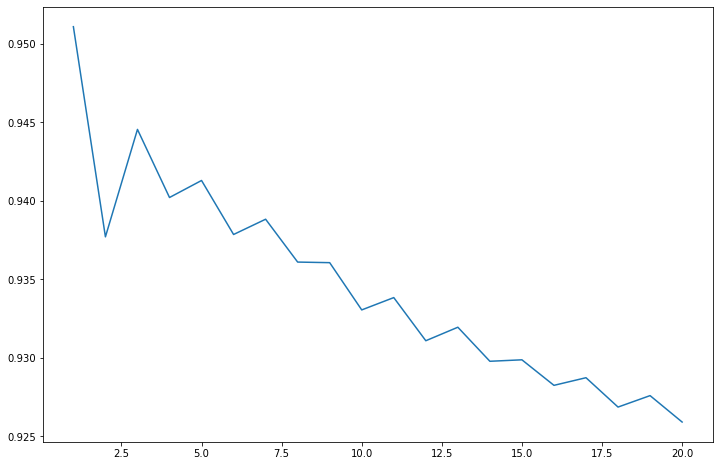

In [91]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(1,21),scores)

In [92]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

      GALAXY       0.94      0.91      0.93     17917
         QSO       0.96      0.97      0.97     17571
        STAR       0.95      0.97      0.96     18013

    accuracy                           0.95     53501
   macro avg       0.95      0.95      0.95     53501
weighted avg       0.95      0.95      0.95     53501



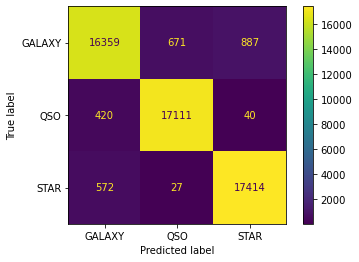

In [93]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
plot_confusion_matrix(knn,X_test,y_test)

## Hyperparameter Tuning using GridSearchCV and miscellaneous cross-validation techniques

In [94]:
# param_grid = {'C': [.1,1,100,500,1000], 'gamma': [.1,.01,.001,.0001], 'kernel': ['rbf']}
# grid_svm = RandomizedSearchCV(svm,param_grid,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=2),verbose=3)
# grid_svm.fit(X_train,y_train)

In [95]:
# param_grid = {'n_estimators': [100,200,500,800,1000], 'learning_rate': [.2,.4,.6,.8,1]}
# grid_gbc = RandomizedSearchCV(gbc,param_grid,cv=RepeatedKFold(n_splits=4,n_repeats=2),verbose=4)
# grid_gbc.fit(X_train,y_train)

## Saving the model for future use

In [96]:
joblib.dump(cat,'model.pkl')

['model.pkl']

In [97]:
model = joblib.load('model.pkl')
model

In [99]:
joblib.dump(scaler,'scaler.bin')

['scaler.bin']

In [100]:
scaler = joblib.load('scaler.bin')
scaler

StandardScaler()